# Code for BB84  protocol

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string
import os

#Function for assigning Standard (s) or Hadamard (h) measurement basis
def randomString(stringLength=2):
    """ Generate a random string of fixed length """
    basis = 'sh'
    return ''.join(random.choice(basis) for i in range(stringLength))

#Function for executing the BB84 protocol using n qubits and N check-bits
def BB84(n,N,Eve=True,Strings=False):
    """    
    BB84(n,N)
    
    n: Number of bits to be used for the key
    
    N: Number of bits to be checked
    
    Eve: Default True. If True, Eve will be present in the protocol. If False, Eve will not be present.
    
    Stings: Default False. If True, return Alice's , Bob's and Eve's:
    1- initial bit strings
    2- keys
    3- initial basis used
    4- check bit sequence
    
    --------
    
    Returns
    
    R: List of strings of "OK" and "ABORT" that indicate when Eve has been detected
    
    a: List of Alice's bits
    b: List of Bob's bits
    e: List of Eve's bits
    x: List of Alice's key
    y: List of Bob's key
    z: List of Eve's key
    
    aa: List of Alice's bases assignments
    bb: List of Bob's bases assignments
    ee: List of Eve's bases assignments
    
    xx: List of Alice's check-bits
    yy: List of Bob's check-bits
    
    """
    
    a=[]
    b=[]
    e=[]
    x=[]
    y=[]
    z=[]
    
    aa=randomString(n)  #Alice's bases assignment
    bb=randomString(n)  #Bob's bases assignment
    if Eve==True:
        ee=randomString(n)  #Eve's bases assignment (when present)
    else:
        ee=aa  #When Eve's not present, she can be thought of as being present, 
               #but having exactly the same bit-string and same basis as Alice
    
    #Generate a,b,e and x,y,z
    for i in range(n):
        a.append(random.randint(0,1))
        if ee[i]==aa[i]:
            e.append(a[i])
        else:
            e.append(random.randint(0,1))
        if bb[i]==ee[i]:
            b.append(e[i])
        else:
            b.append(random.randint(0,1))
        if aa[i]==bb[i]:
            x.append(a[i])
            y.append(b[i])
            z.append(e[i])

    R=[]

    for j in N:
        if j<=len(x):
            s=random.sample(range(len(x)),j)  #Choice of check-bits
            xx=[]
            yy=[]
            for i in range(j):  #Generate xx,yy
                xx.append(x[s[i]])
                yy.append(y[s[i]])
            if xx!=yy:  #Check for Eve's presence
                R.append('ABORT')  #Eve detected
            else:
                R.append('OK')     #Eve not detected
        else:
            break
    
    if Strings==False:
        return R
    if Strings==True:
        return R,a,b,e,aa,bb,ee,x,y,z,xx,yy,s

# One instance of BB84

In [28]:
R,a,b,e,aa,bb,ee,x,y,z,xx,yy,s=BB84(128,range(3),Strings=True)
print("Alice's Check sequence: ",xx)
print("Bob's Check sequence:   ",yy)
print('qubits checked are # :  ',s)
print("Result of Simulation: ",R[-1])

Alice's Check sequence:  [0, 1]
Bob's Check sequence:    [1, 1]
qubits checked are # :   [11, 27]
Result of Simulation:  ABORT


In [29]:
print("Alice's keys: ",x)
print()
print("Bobs's keys: ",y)
print()
print("Eve's keys: ",z)
print()
print("Alice's Basis: ",aa)
print()
print("Bobs's Basis: ",bb)
print()
print("Eve's Basis: ",ee)

Alice's keys:  [1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]

Bobs's keys:  [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]

Eve's keys:  [1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]

Alice's Basis:  sssshssshhshhhshshhshsshhhsssshhhsssssshhhhhhshshhshshsssssshssshshhshshhhsshhhhhsssshhhshhshsshhsshshhsshhssshhhshhshhshshshssh

Bobs's Basis:  ssshhhhssshhshhshhhshsssshsshhhhhshhhssshsshsshsshsshhhssshsssshsshhhhhhsshhhhhhssshhsshshhhhshhssshssshshhhhshhhhshhhshhshhhsss

Eve'

# Simulation of the BB84 protocol

In [2]:
k1=100 #Number of iterations of BB84
k2=100 # Sample points 
n=128 #Number of qubits

a=np.arange(5)# dummy variable 
N=2**a #Number of check-bits

# In order to see the simulation with data for all values of possible checkbits uncomment the next line
N=np.arange(1,16)

In [3]:
dist=np.empty([k2,len(N)]) #Probability distribution

#Generate dist,avrg
for j in range(k2):  #Loop for generating dist
    abort=np.zeros(len(N),int) #Number of ABORT
    for i in range(k1):  #Loop for executing BB84
        R=BB84(n,N)
        for m in range(len(R)): #Loop for each N
            if R[m]=='ABORT': #Check for ABORT results
                abort[m]+=1
    pabort=abort/k1  #Experimental probability of ABORT
    dist[j]=pabort

avrg=np.mean(dist,axis=0) #Average of each column of dist

# Now we use Matplotlib's hist function to draw a distribution 

and see what is the average value of finding Eve for the given parameters.



## Configuration of the plots

In [4]:
#Where to store the plots
outpath='plots_BB84'

#Check if folder exists
if outpath not in os.listdir():
    os.mkdir(outpath)
else: 
    print(outpath,'already exists!')


#Configuration for the plots
start = 0
stop  = 1
step  = .05
bins=np.linspace(start, stop, num=250)
    

plots_BB84 already exists!


## For one plot

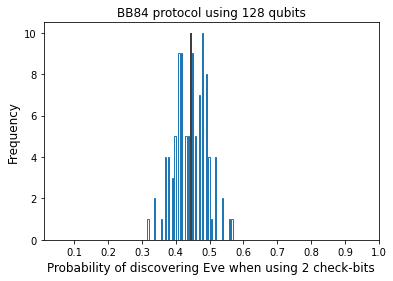

In [44]:
    
#Making 1 single plot
#Specifing qb changes the plot

qb=1
# qb is a power of 2 (2^qb) = the amount of qubits to inspect UNLESS you uncommented the Line at the simulation stage



# plt.figure(num=qb,figsize=(3,3))
plt.figure(num=qb)
count,val,_=plt.hist(dist[:,qb],bins=bins,align='left',histtype='step' )
plt.vlines(x=avrg[qb],ymin=0,ymax=max(count))
# Min,Max=val[0],val[-1]
# ticks=np.arange(Min,Max,step=.01)
# ll=['%.3f' %a for a in val]
plt.xticks(np.arange(start, stop+step, 2*step))
# plt.xticks(ticks=val[::18],labels=ll[::18])
plt.xlabel('Probability of discovering Eve when using %i check-bits' %N[qb],fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xlim(0.01,1.0)
plt.title('BB84 protocol using %i qubits'%n)

plt.savefig(outpath+'/'+'BB84-dist with %i check-bits.png'%N[qb],dpi=200)
plt.show()
plt.close()

## For all plots individually

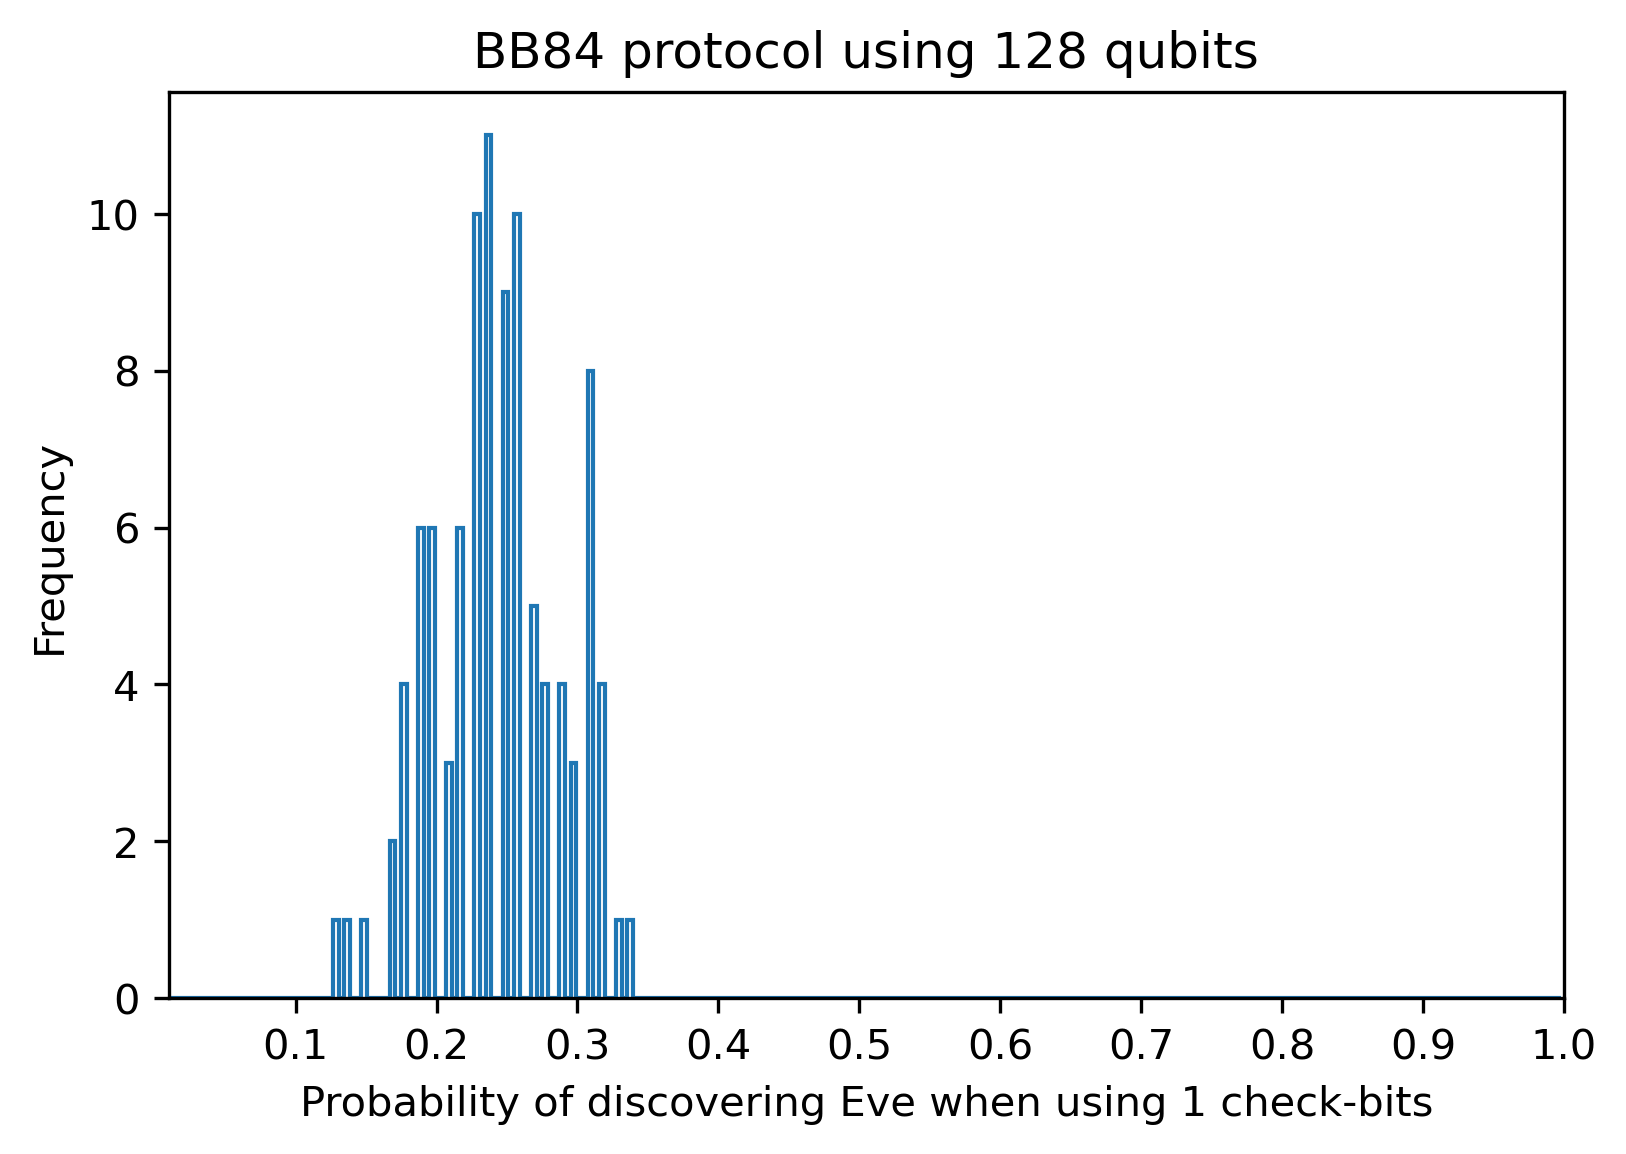

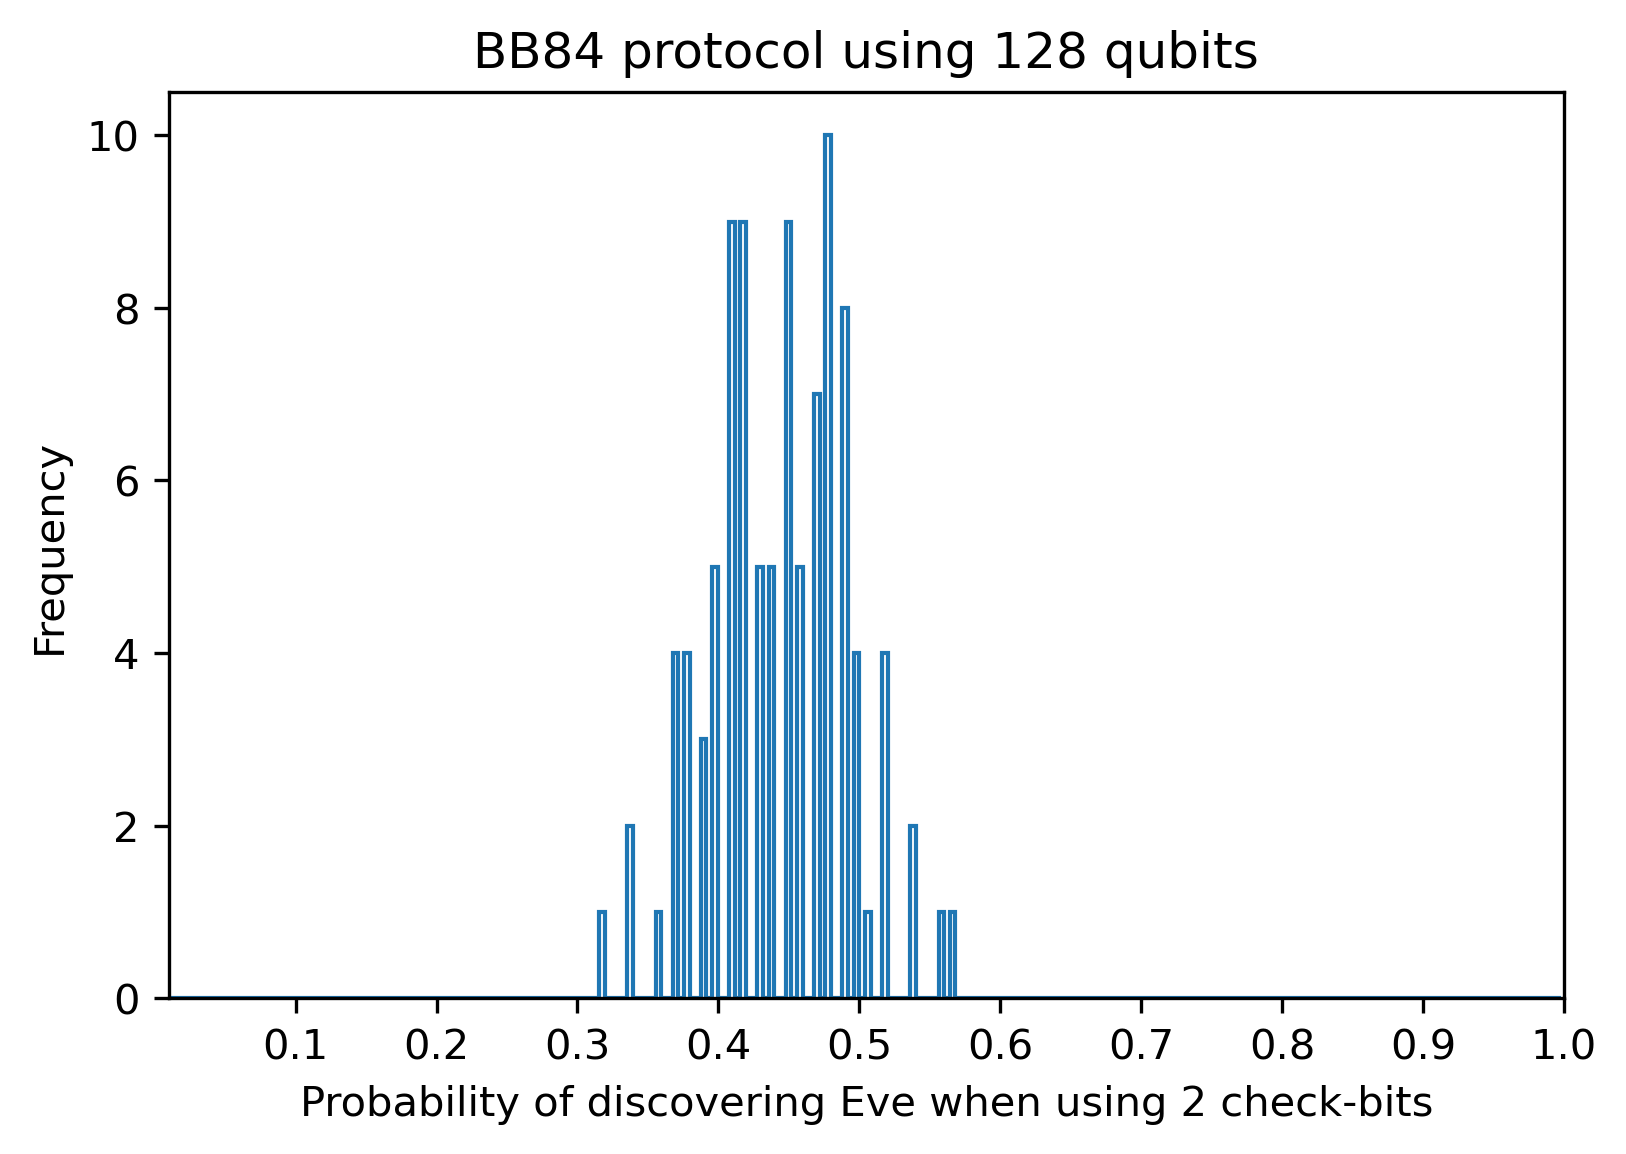

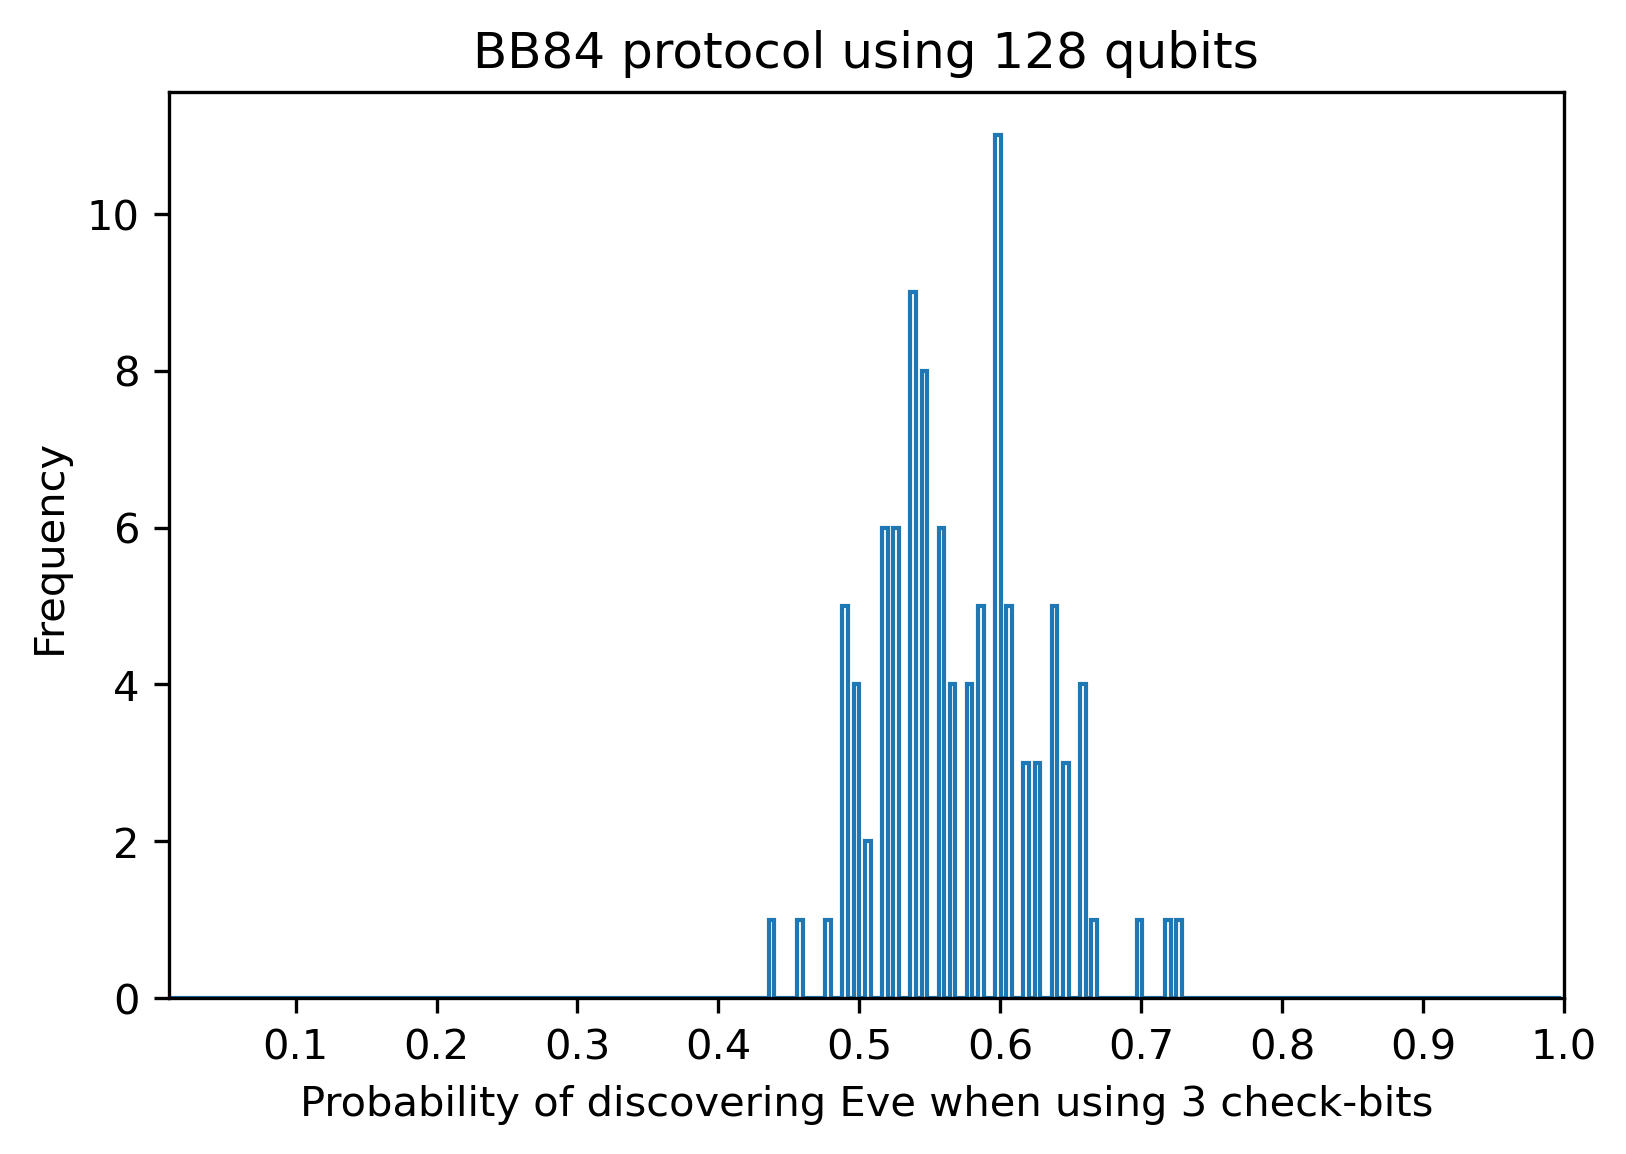

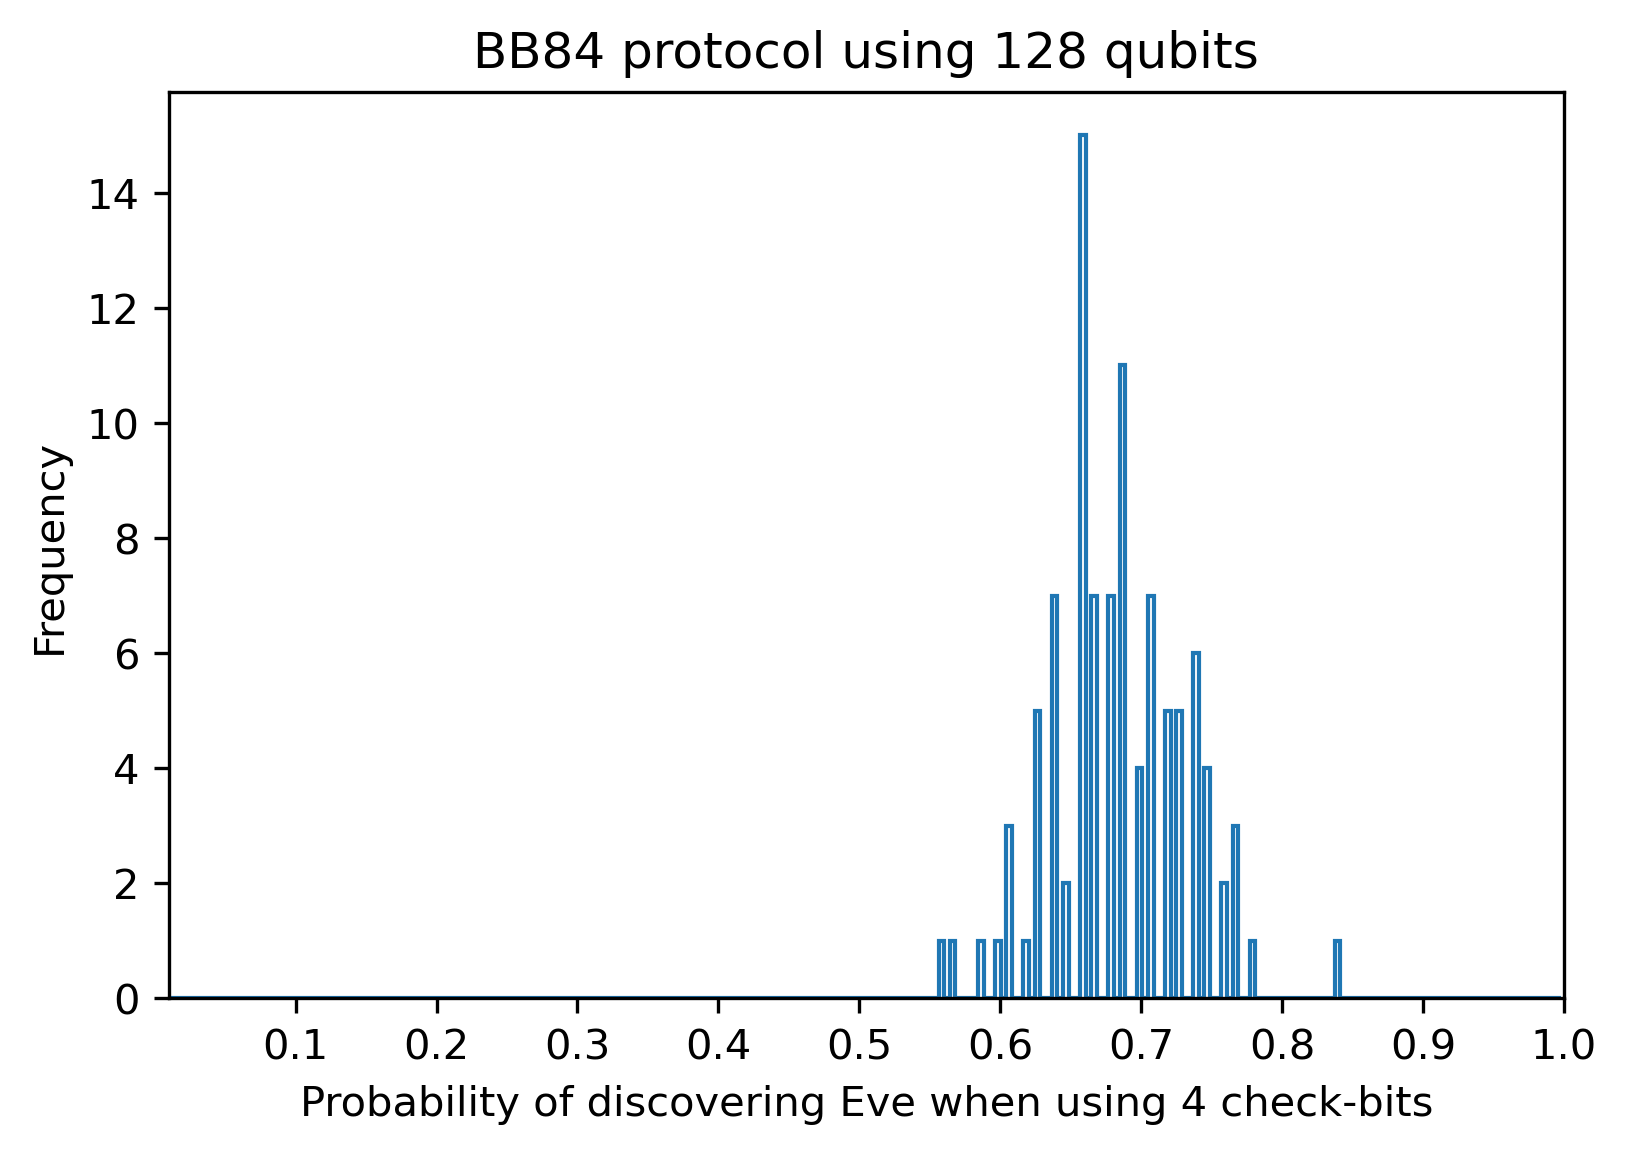

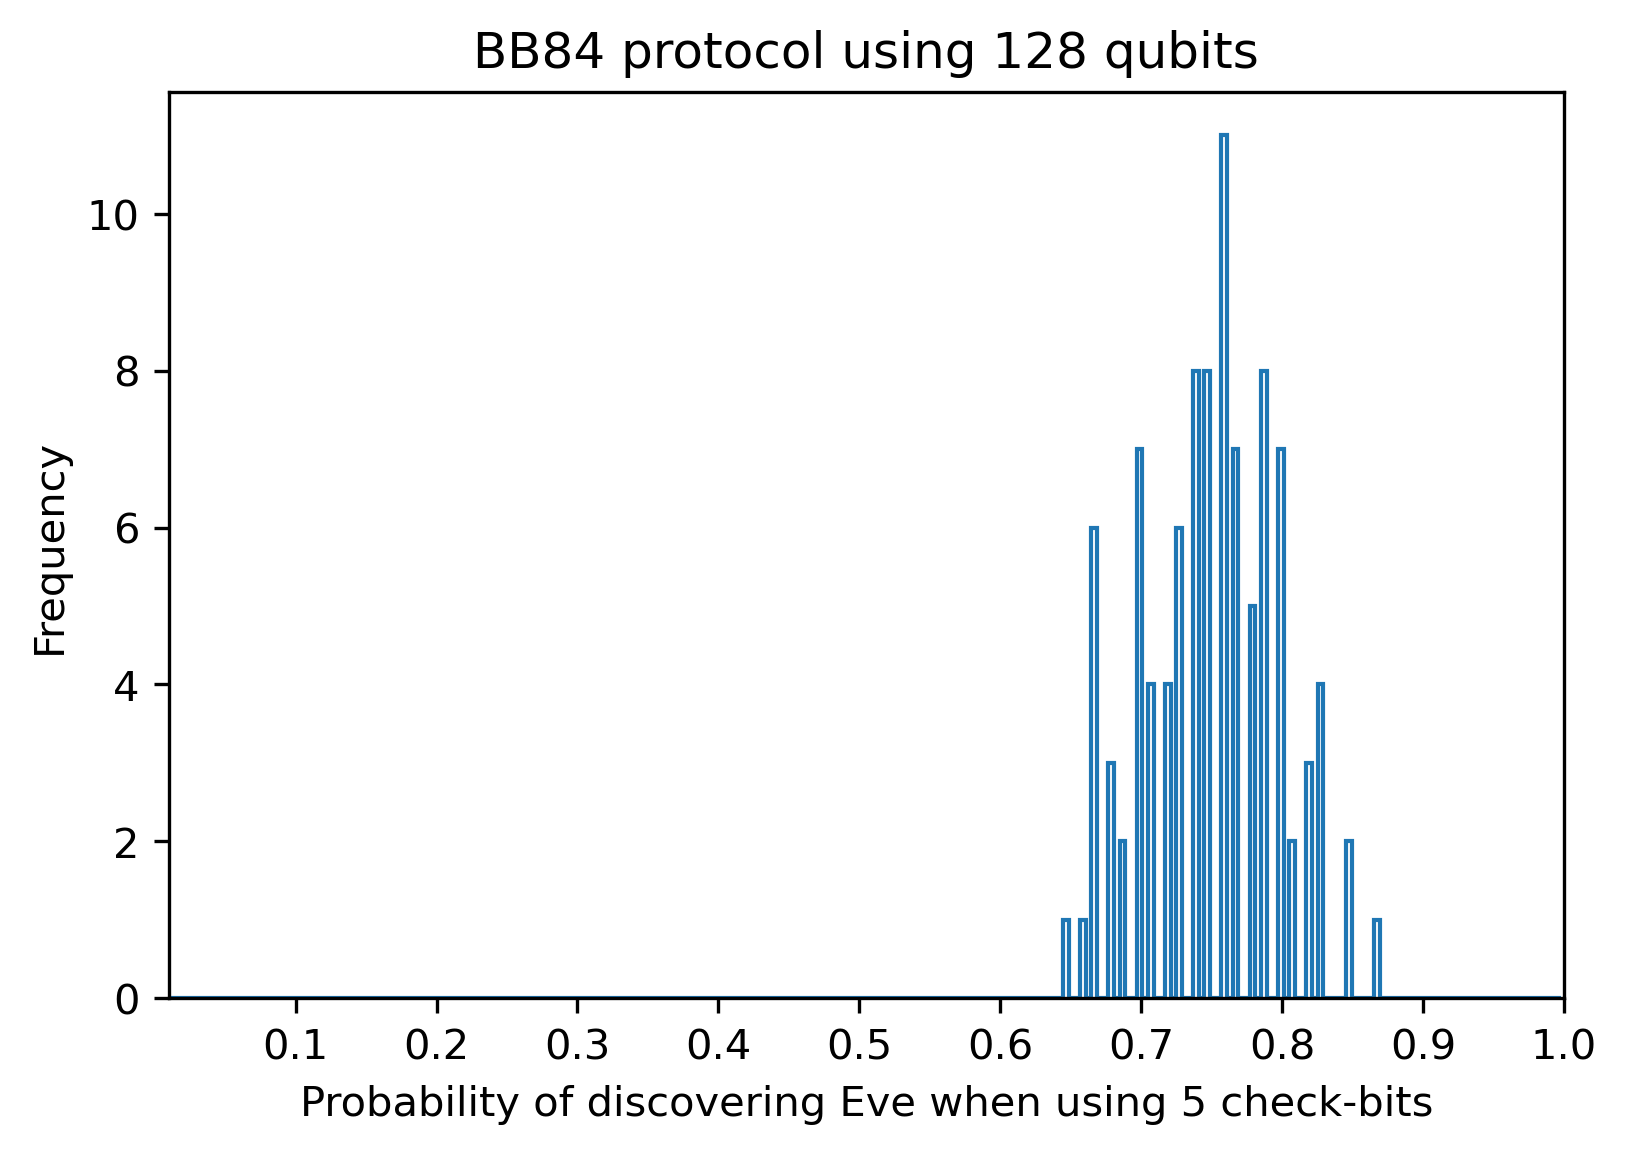

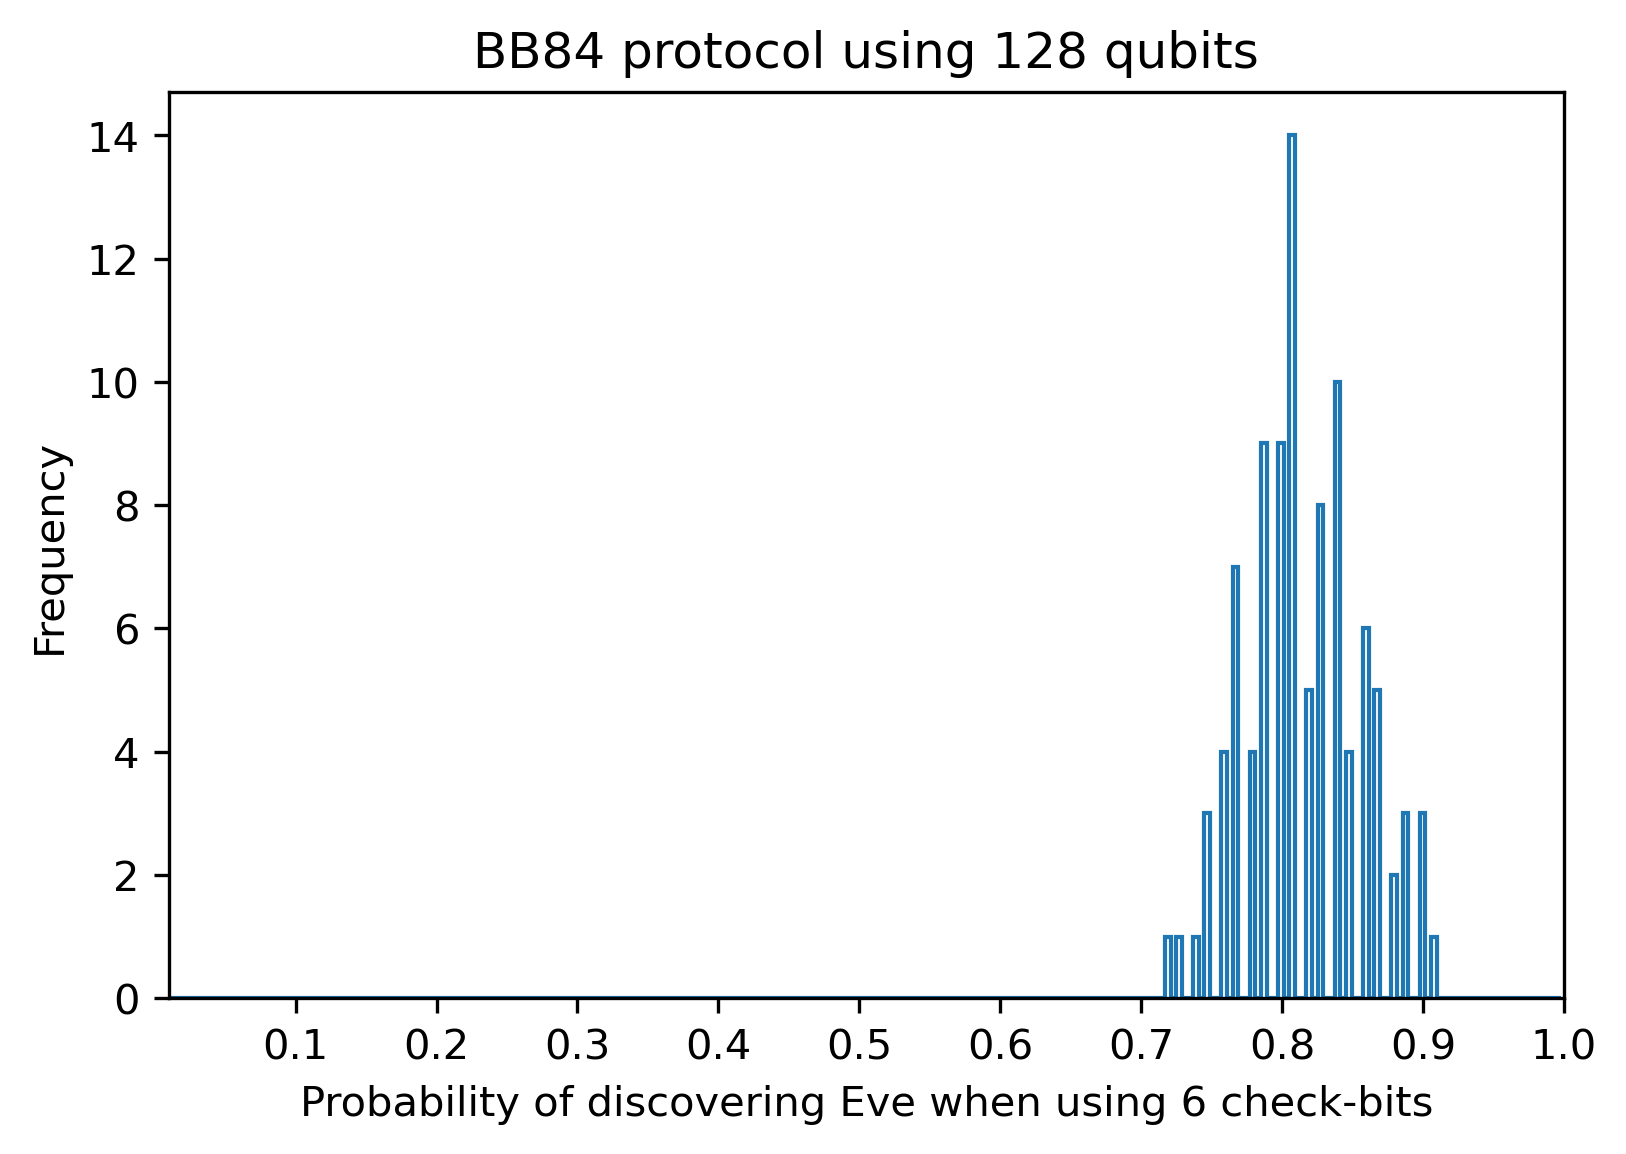

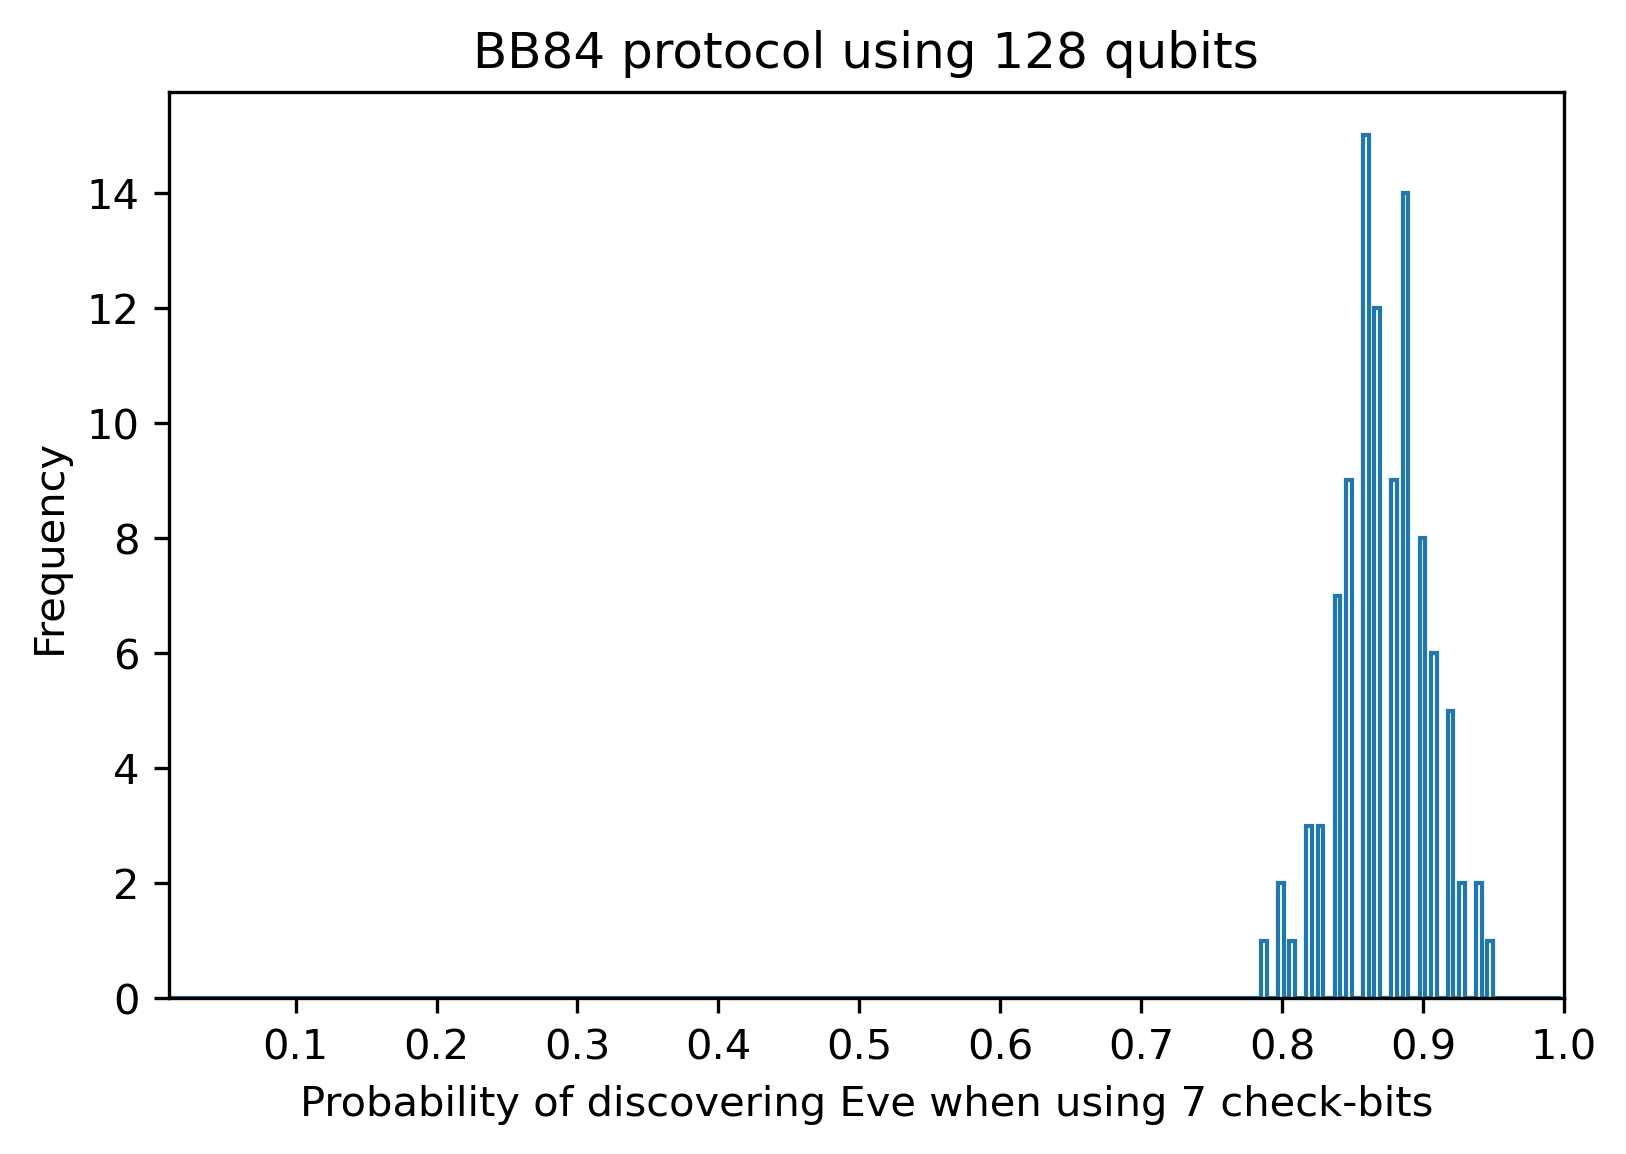

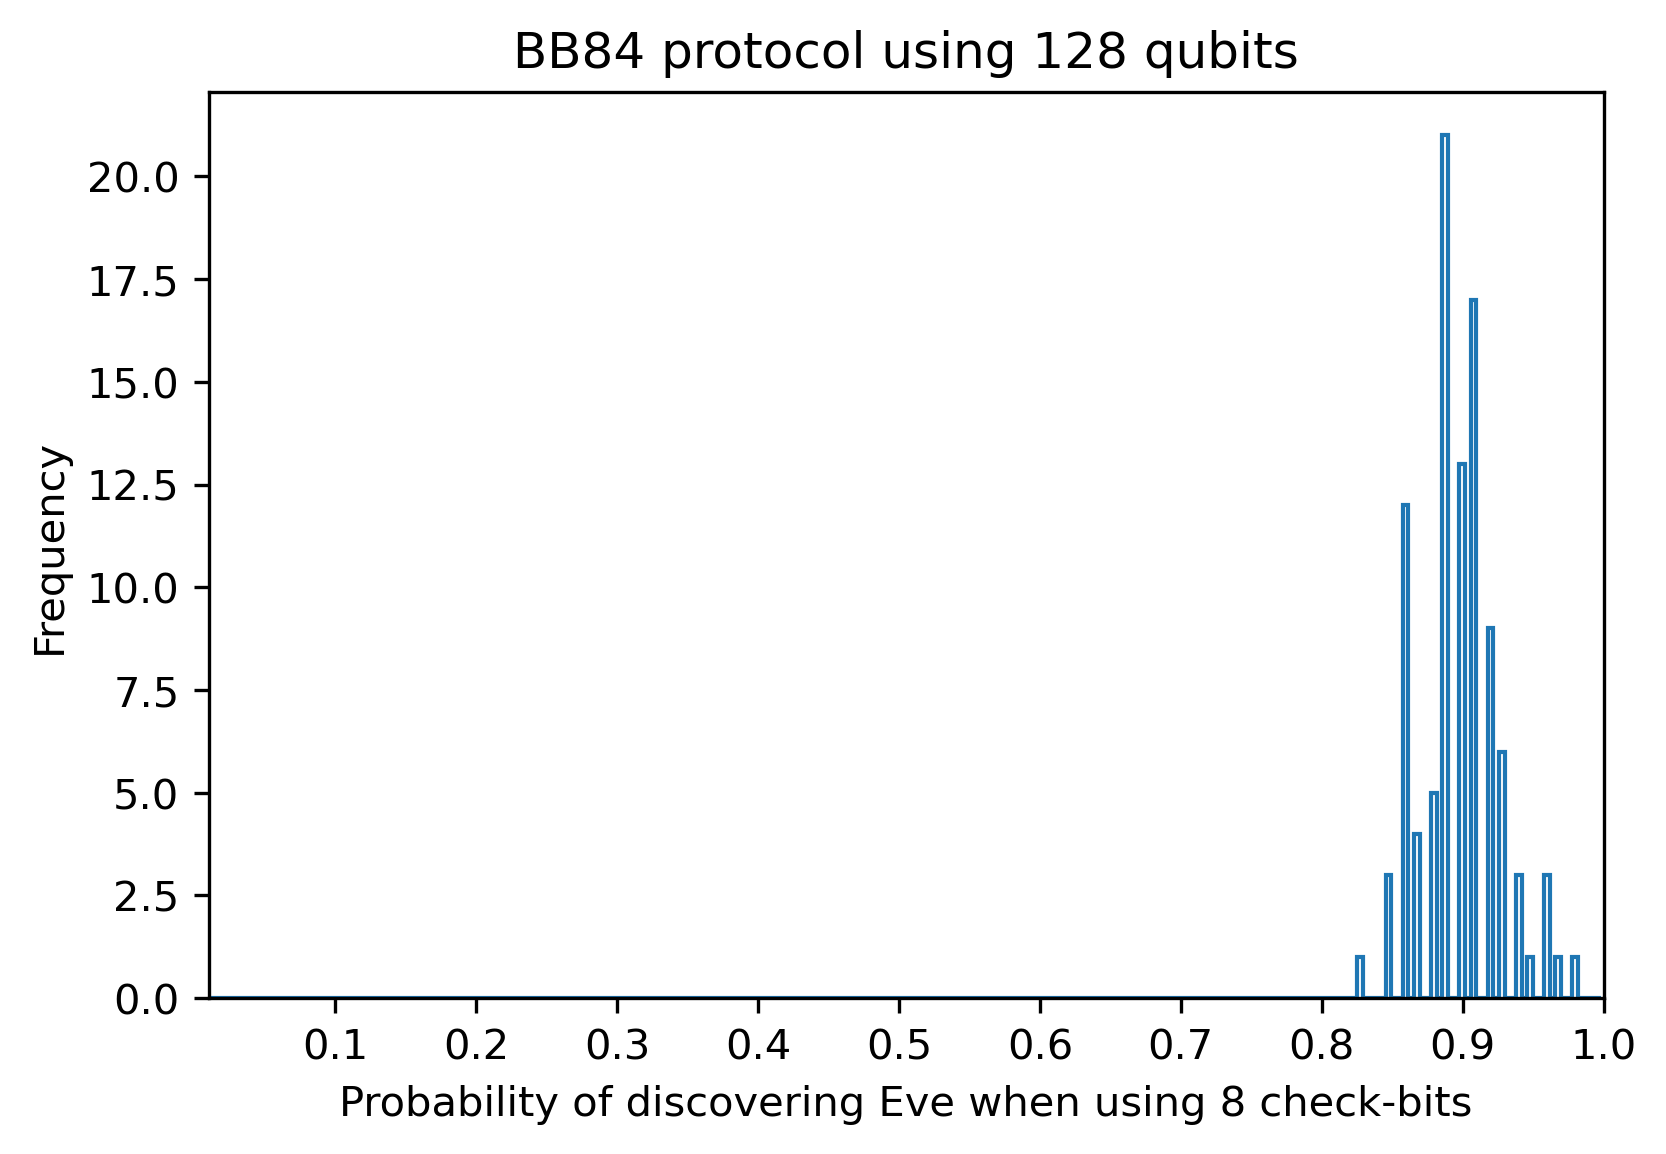

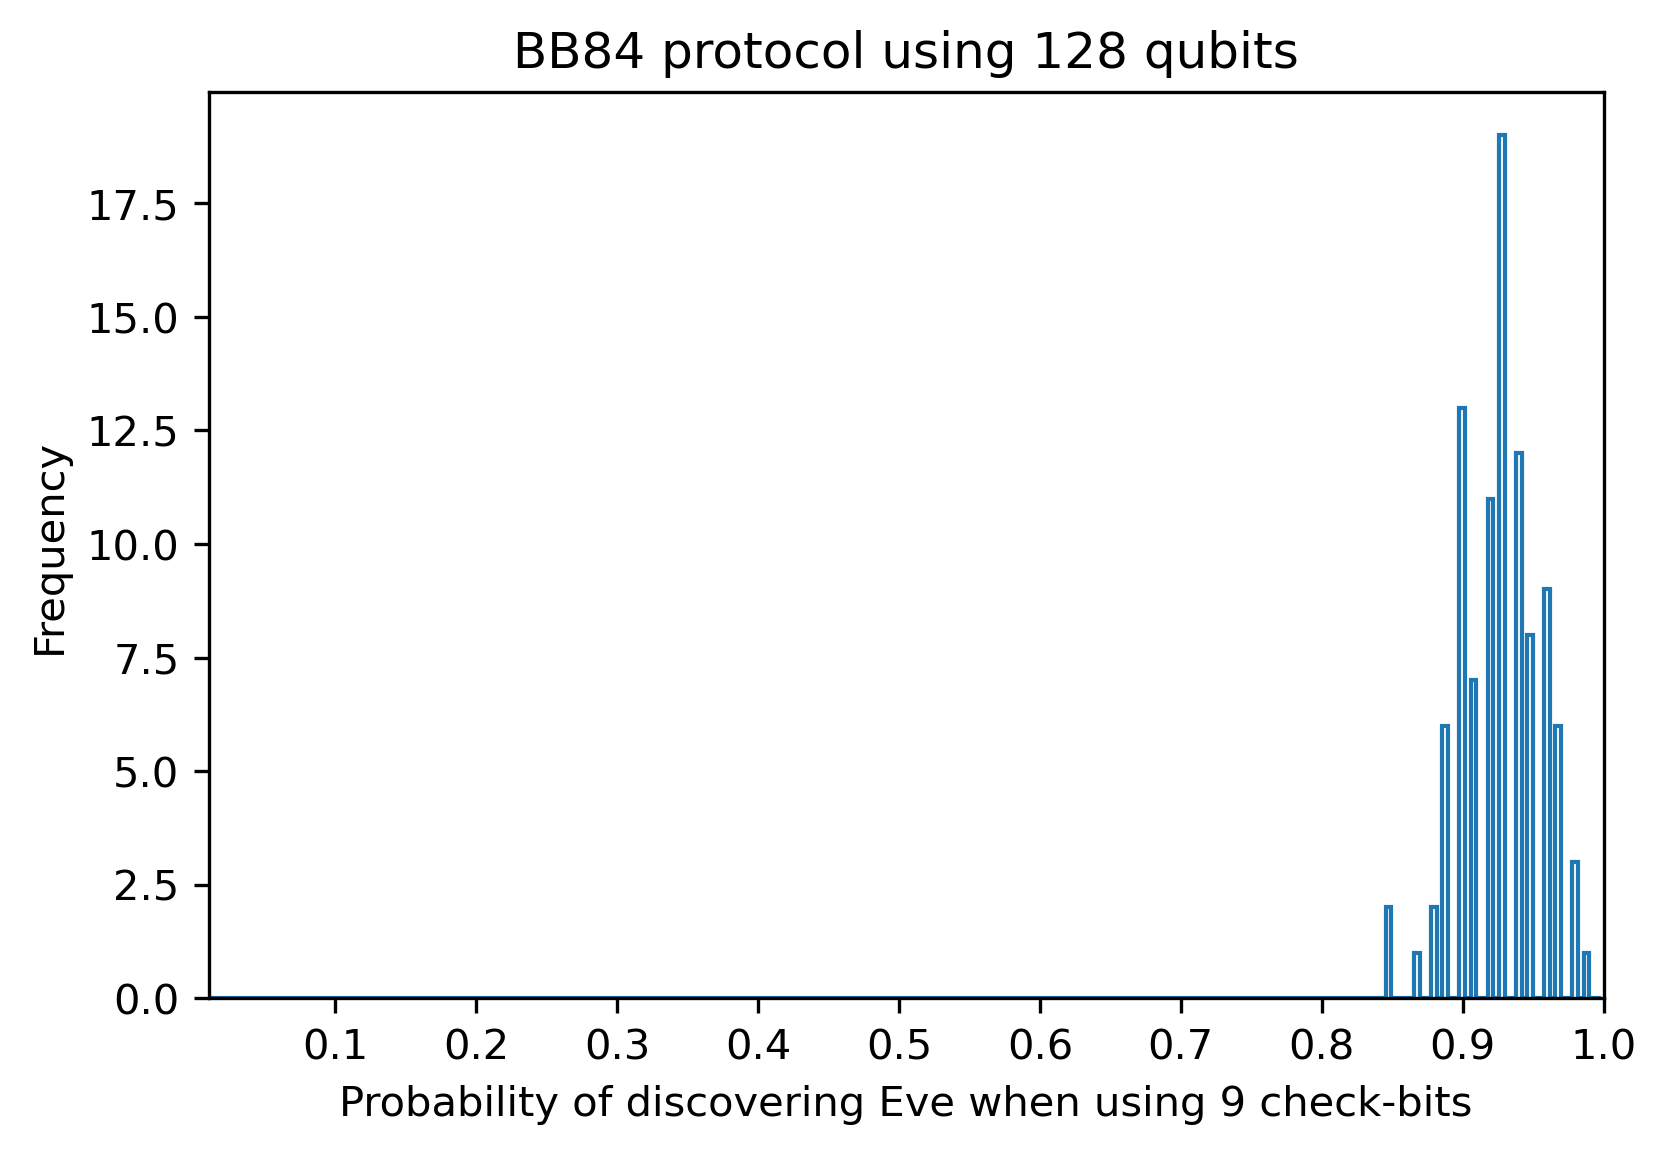

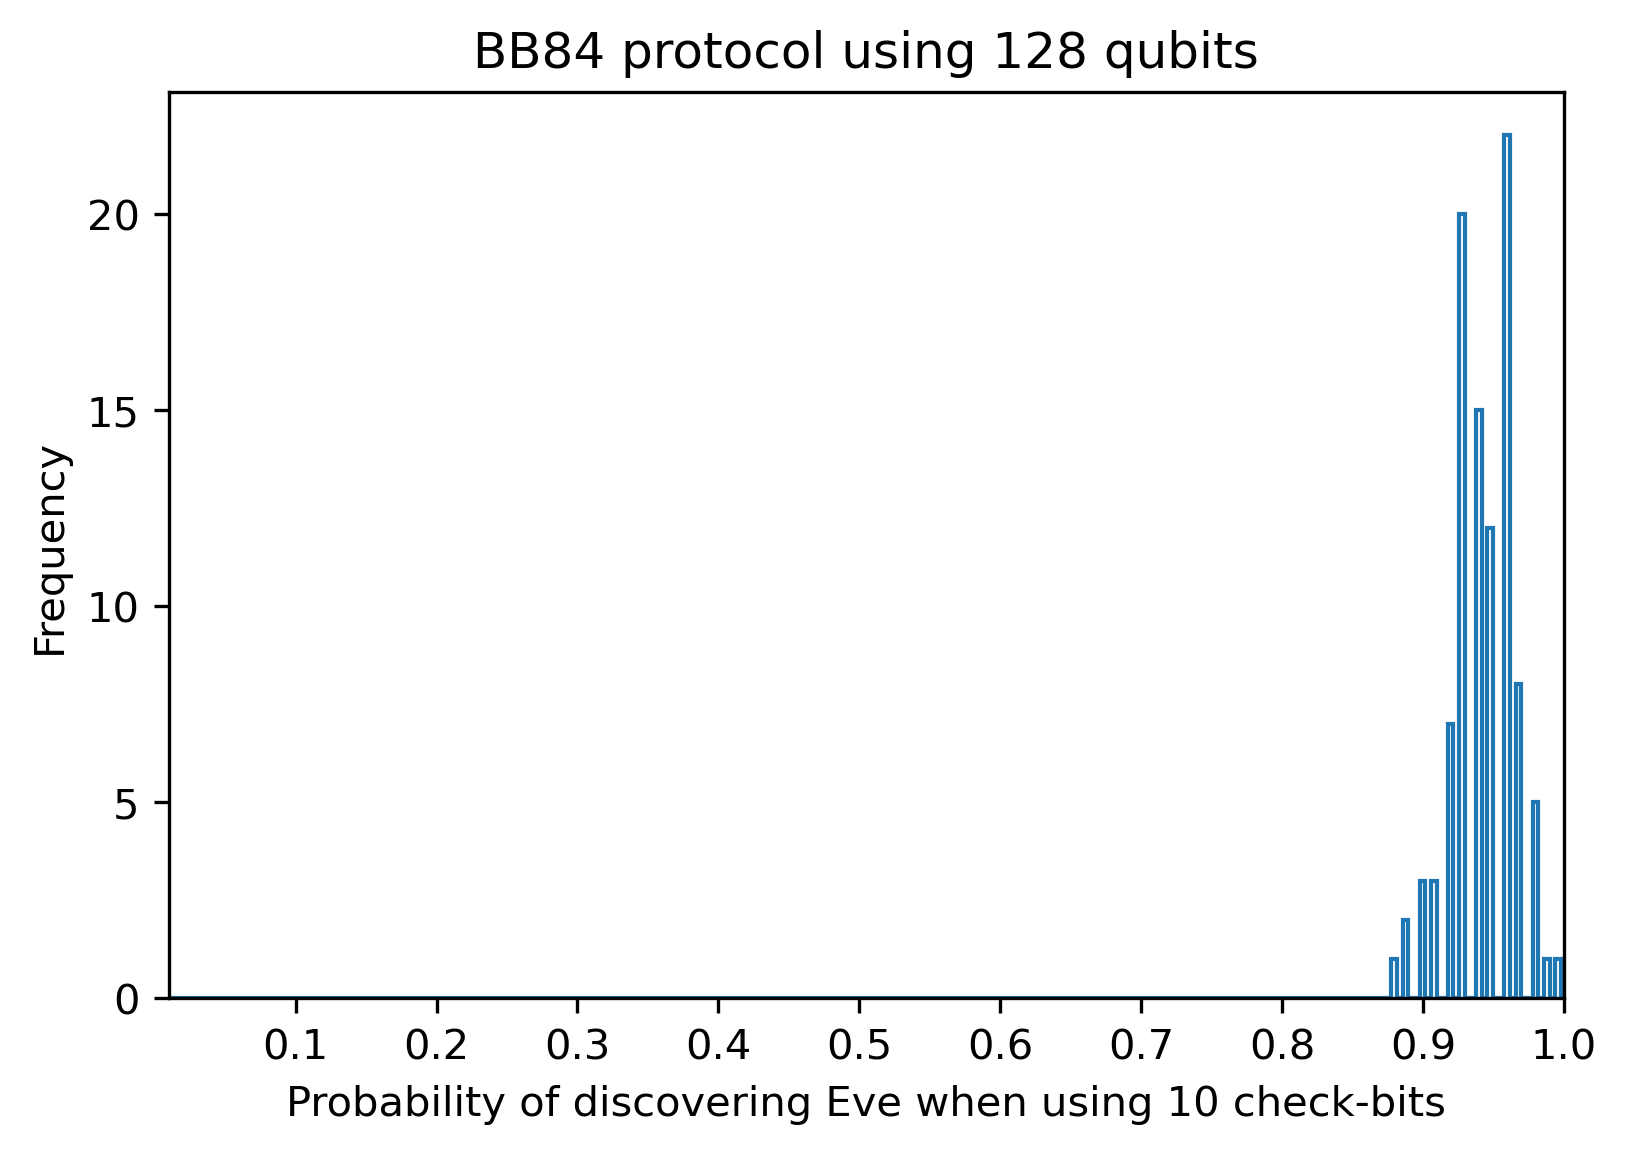

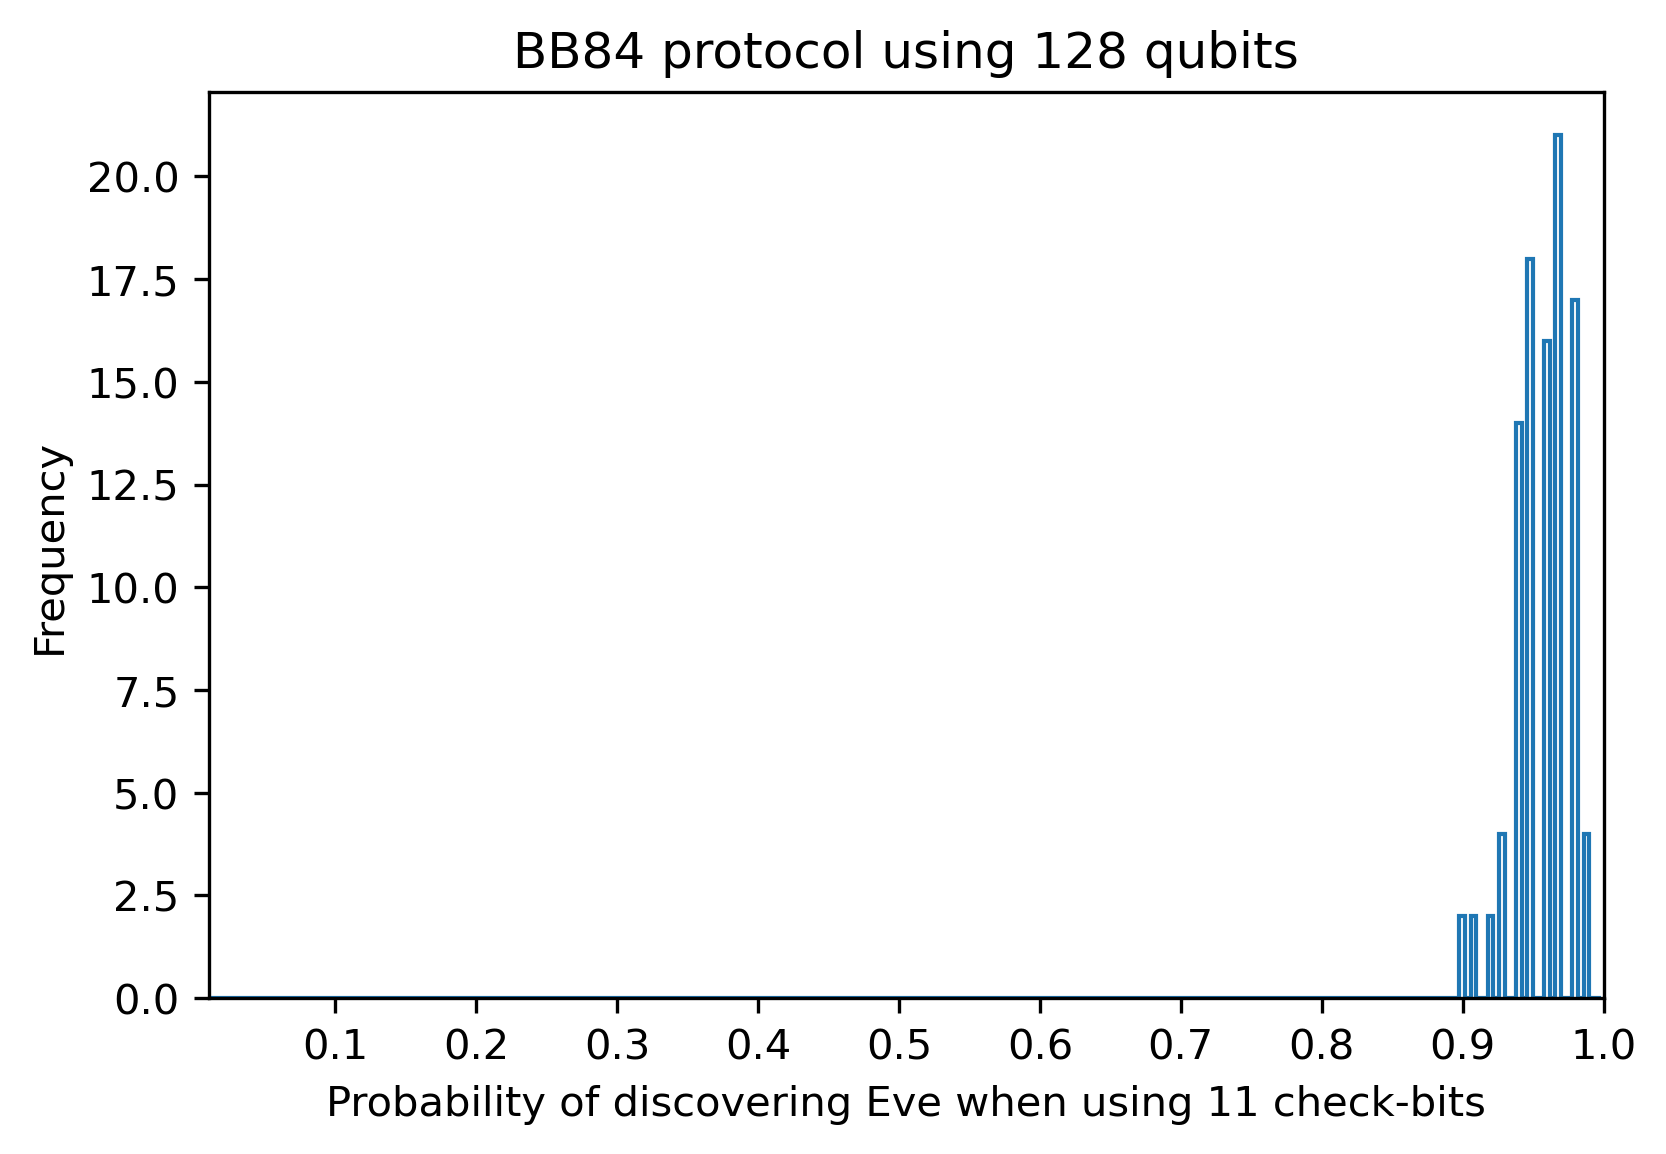

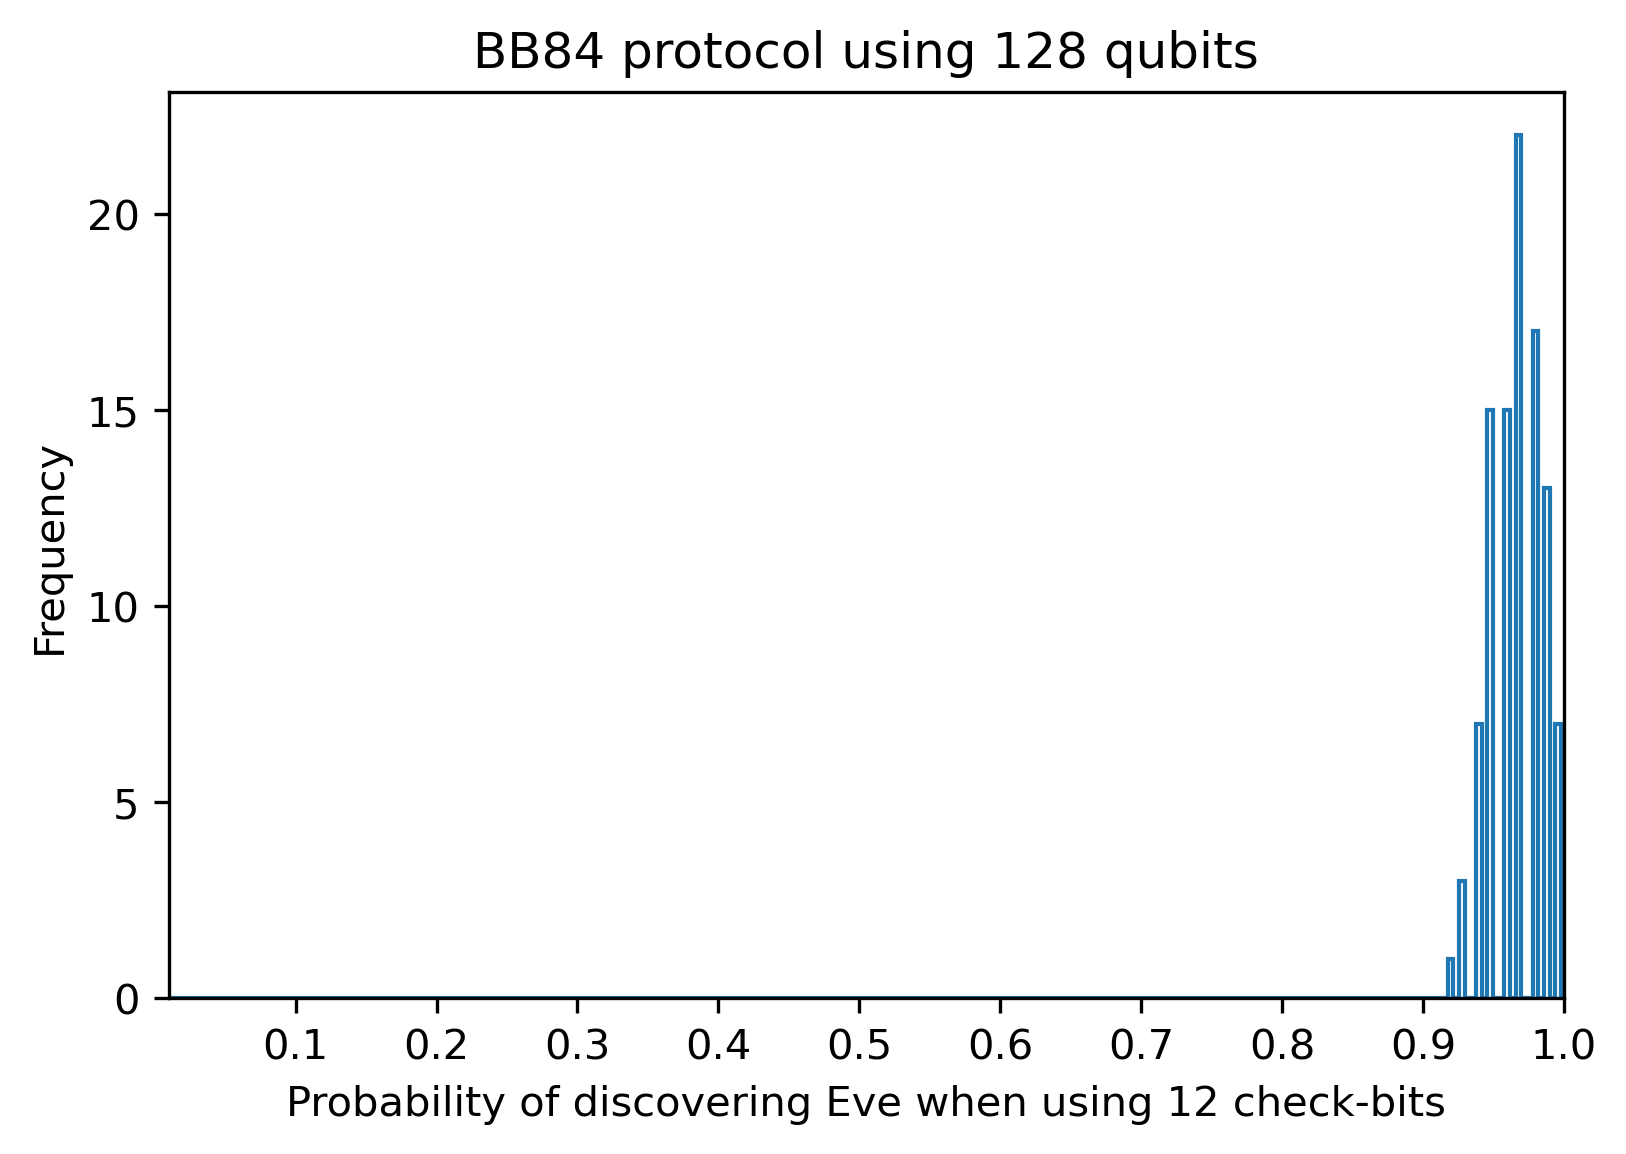

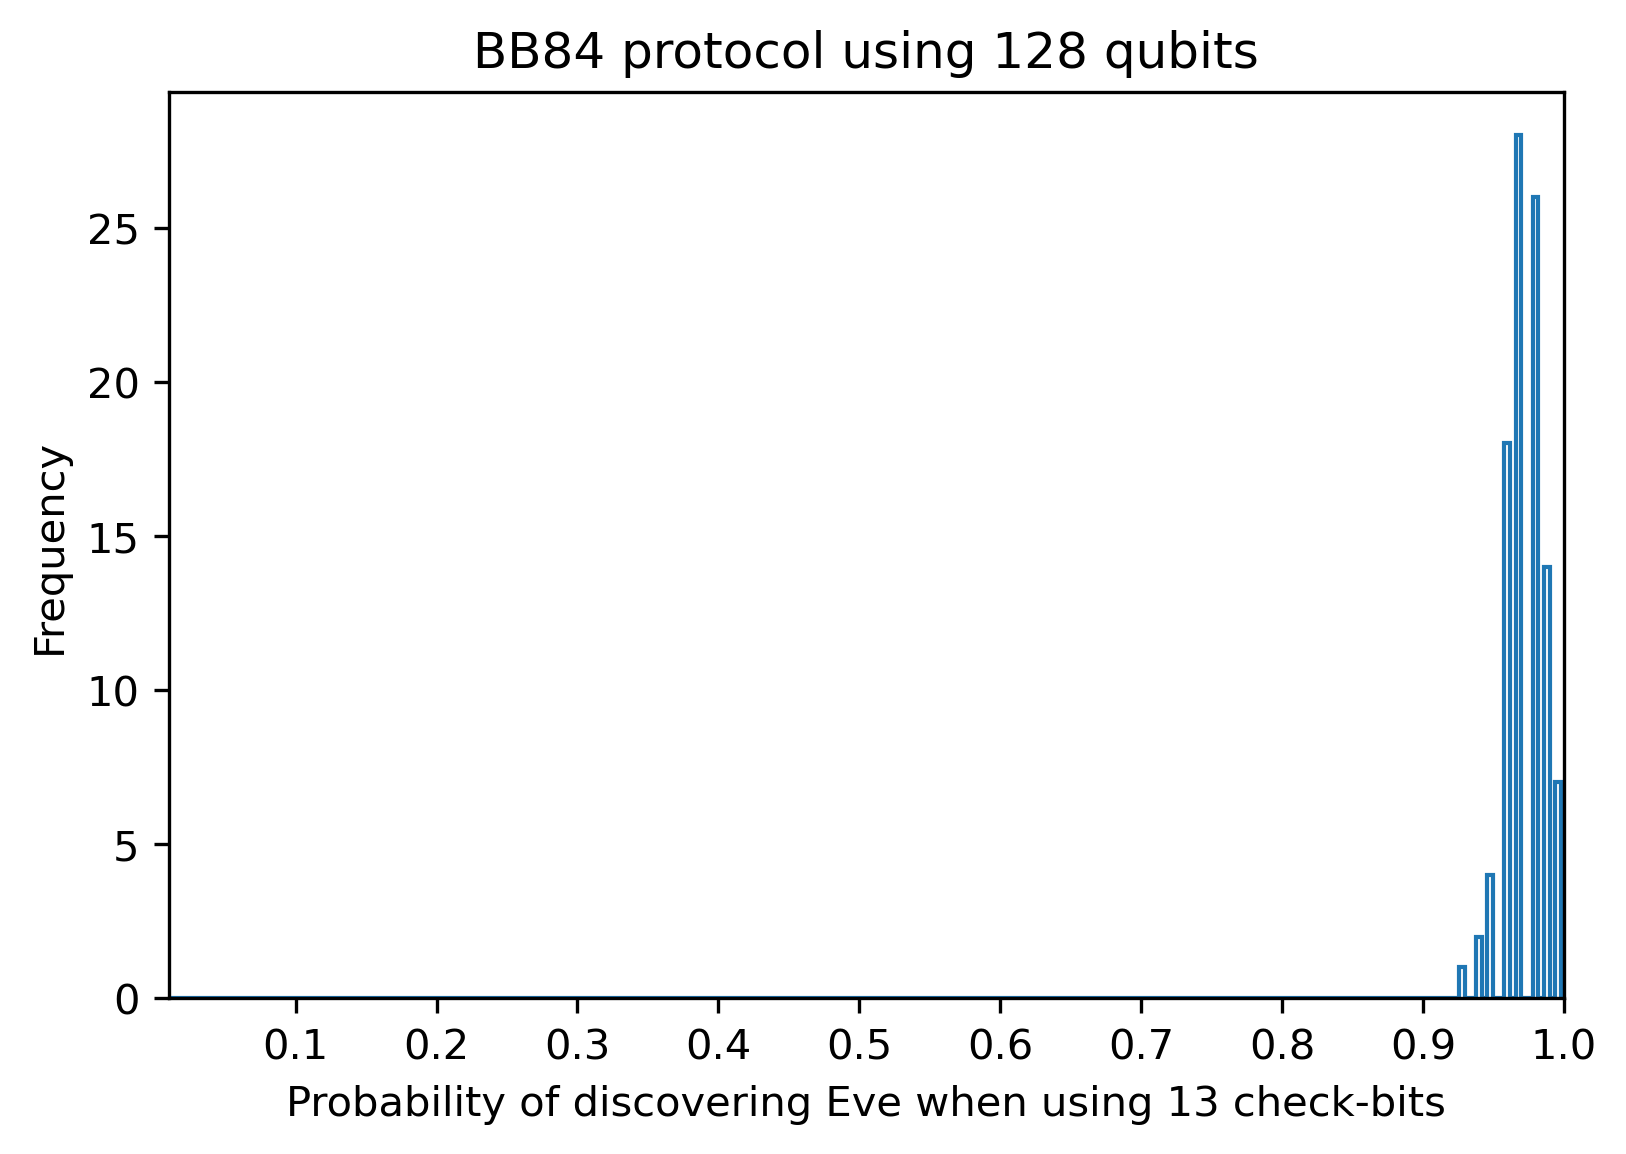

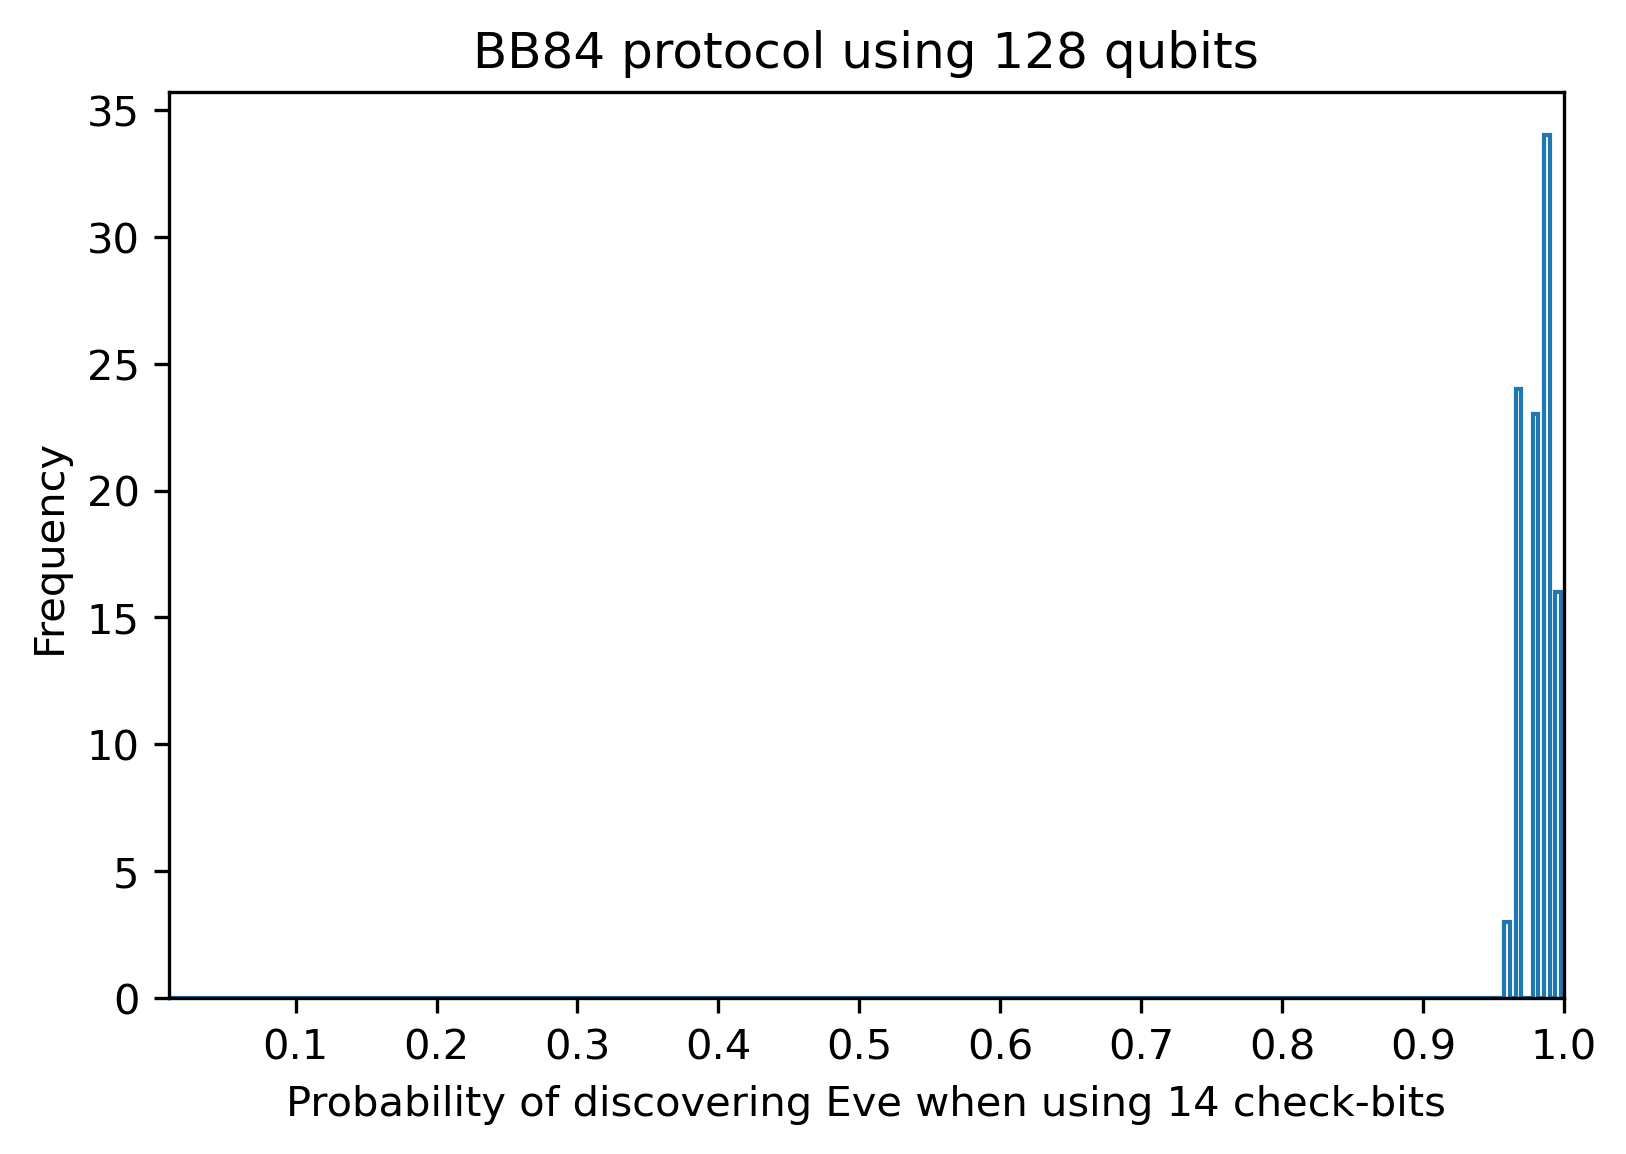

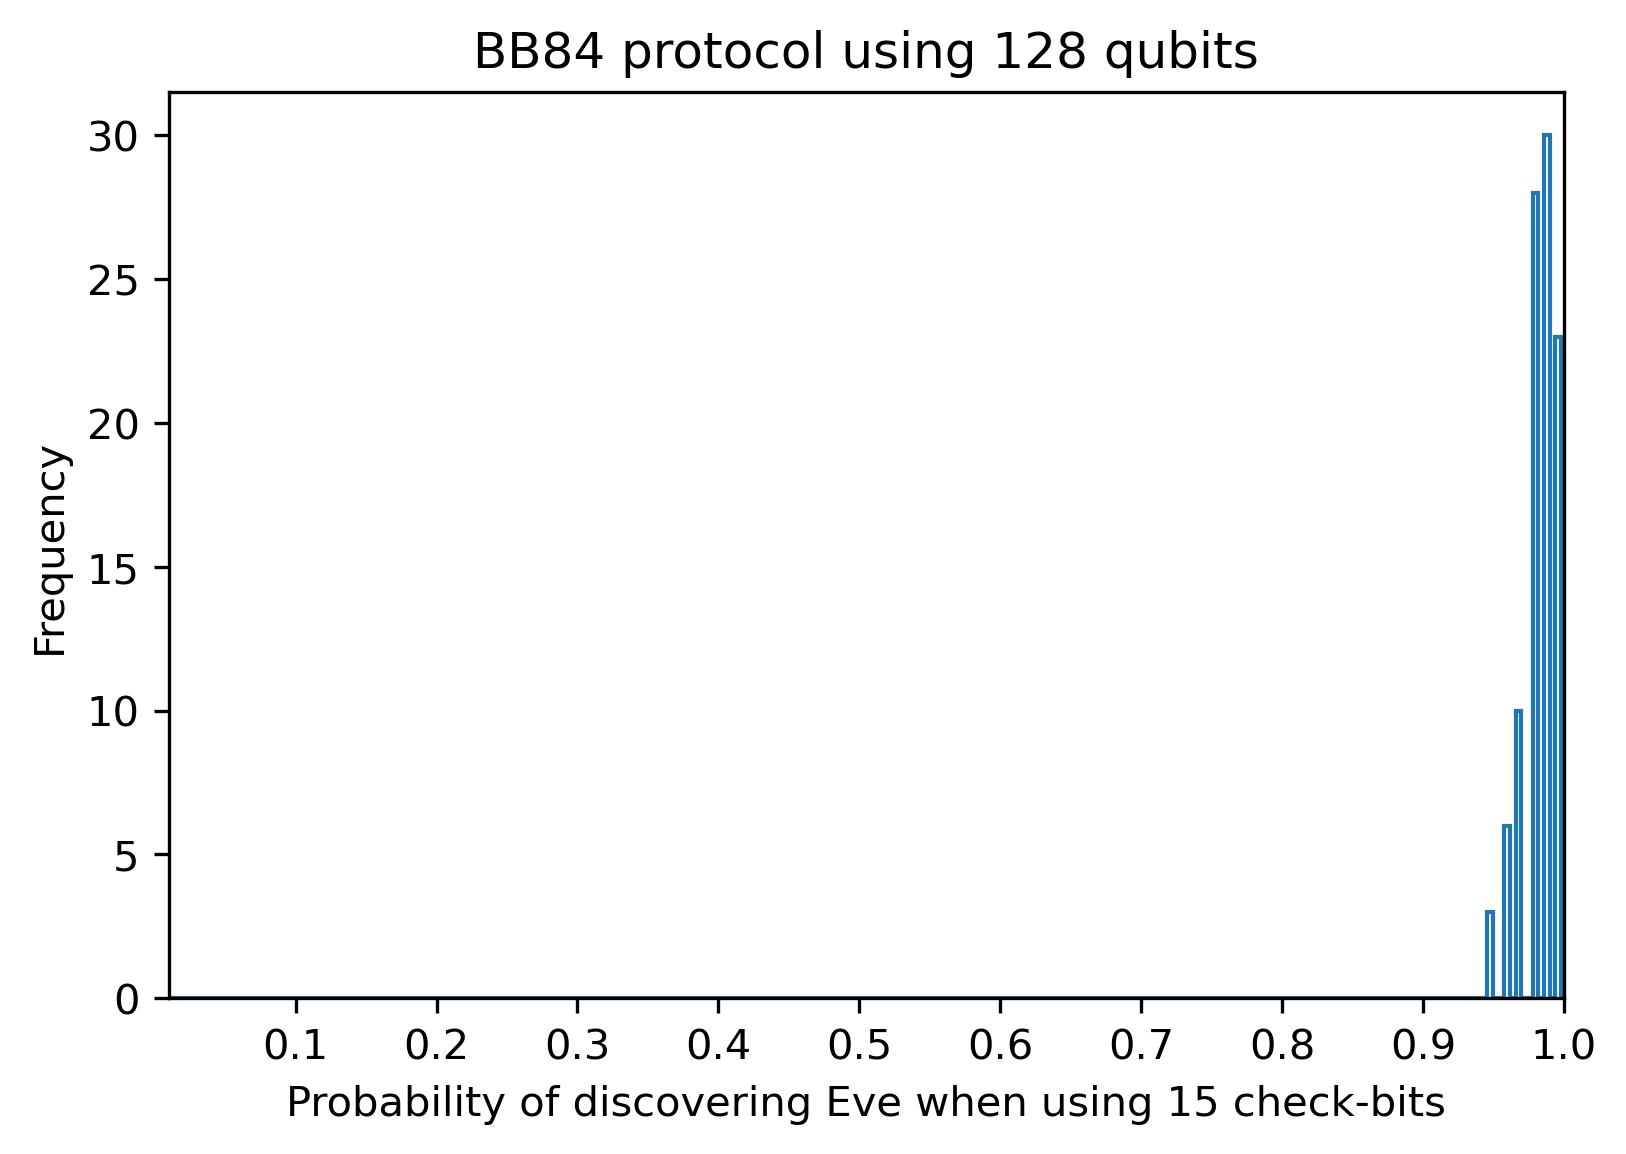

In [46]:
for qb in range(len(N)):
    count,val=[],[]
#     plt.figure(num=qb,figsize=(16,9))
    plt.figure(num=qb,dpi=300)
    count,val,_=plt.hist(dist[:,qb],bins=bins,align='left',histtype='step' )
    plt.xticks(np.arange(start, stop+step, 2*step))
    plt.xlabel('Probability of discovering Eve when using %i check-bits' %N[qb])
    plt.ylabel('Frequency')
    plt.xlim(0.01,1.0)
    plt.title('BB84 protocol using %i qubits'%n)
    plt.savefig(outpath+'/'+'BB84-dist with %i check-bits'%N[qb],dpi=200)
    plt.show()
    plt.close()

## A Closer look

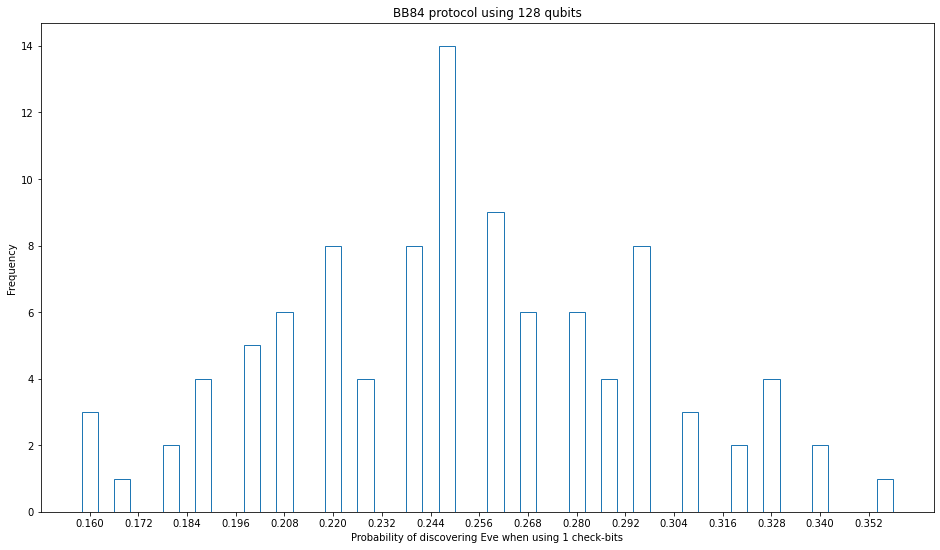

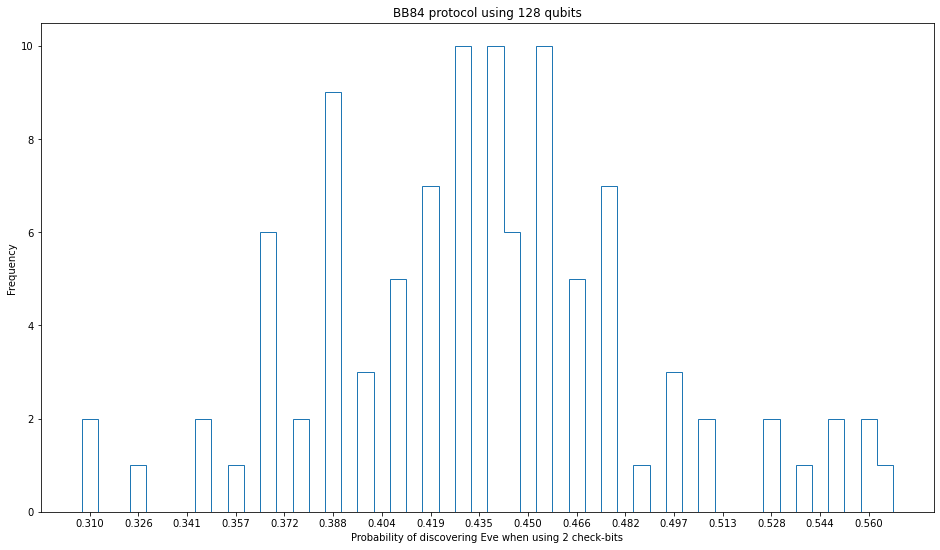

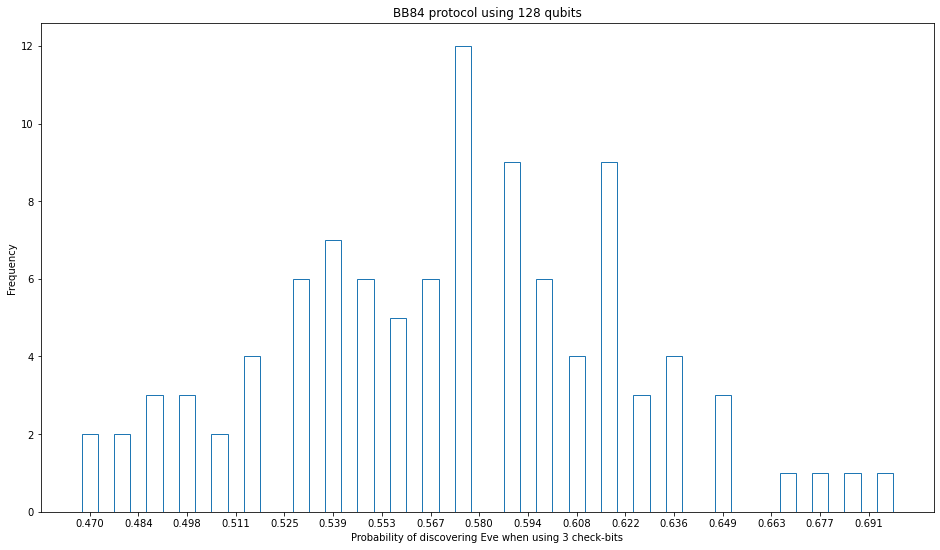

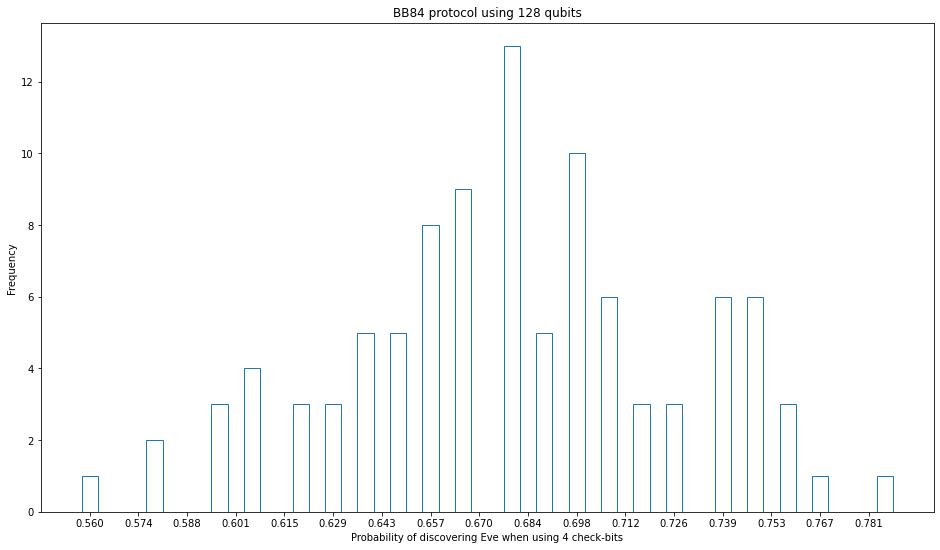

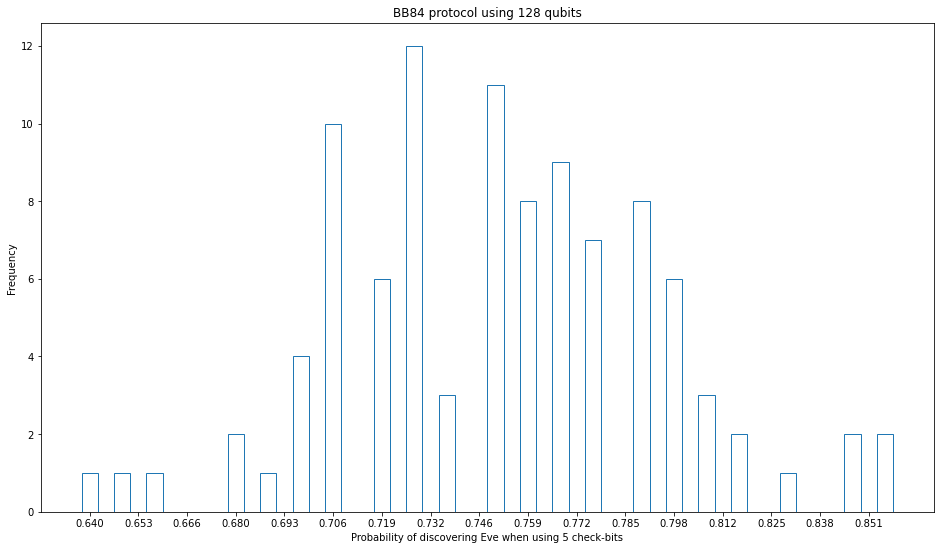

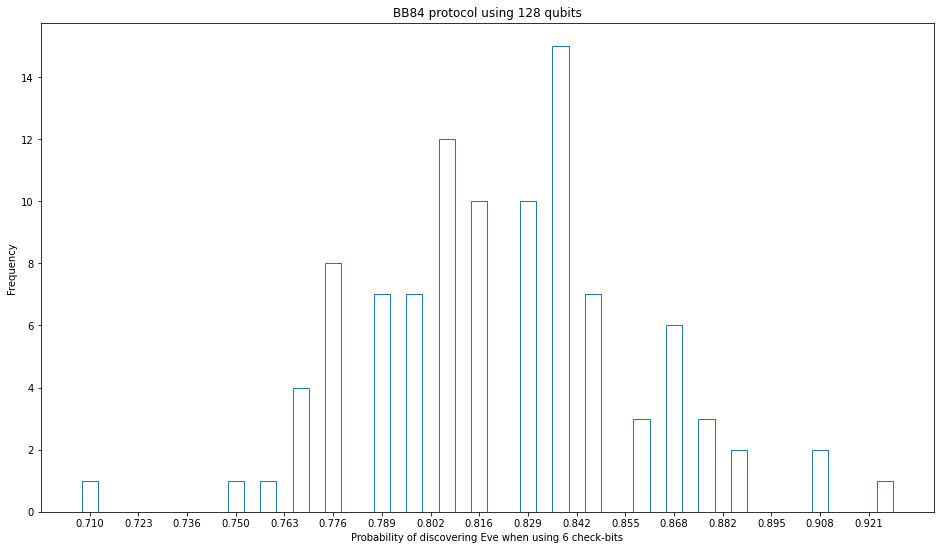

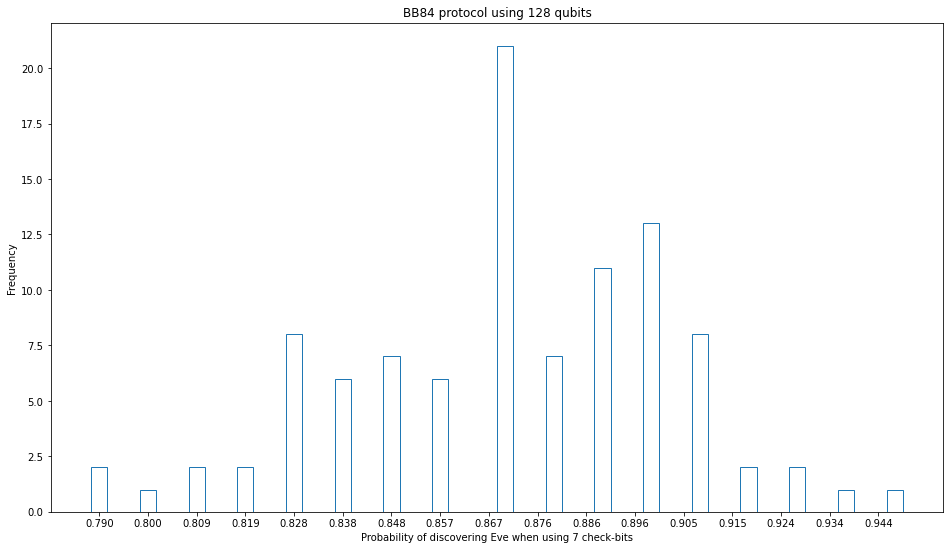

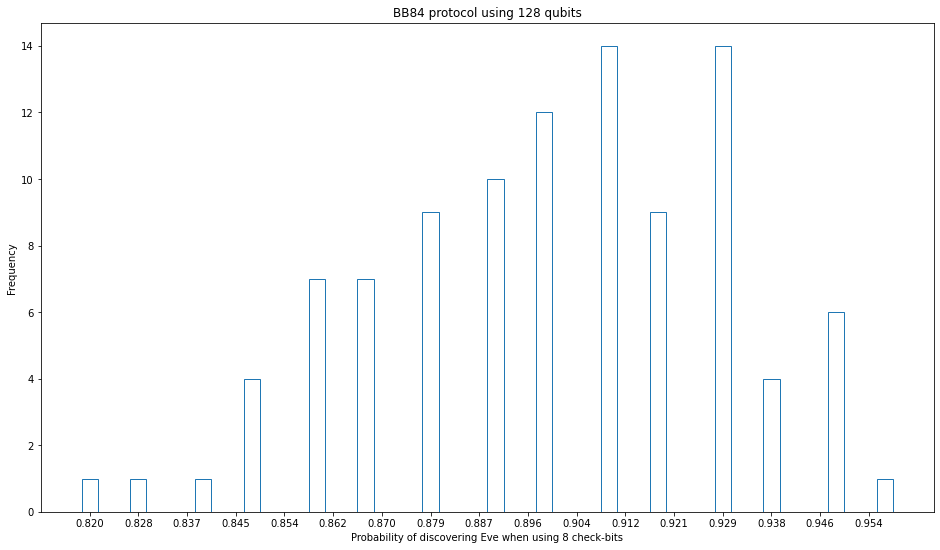

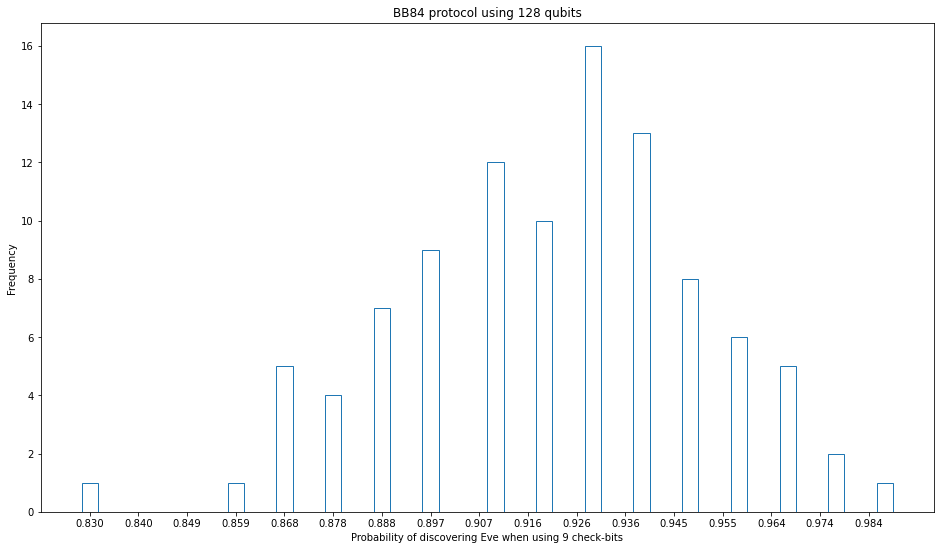

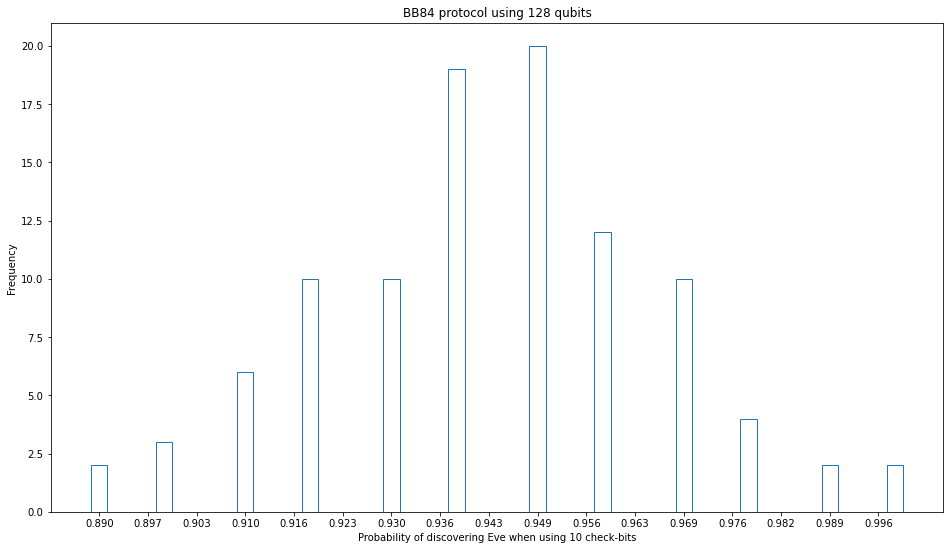

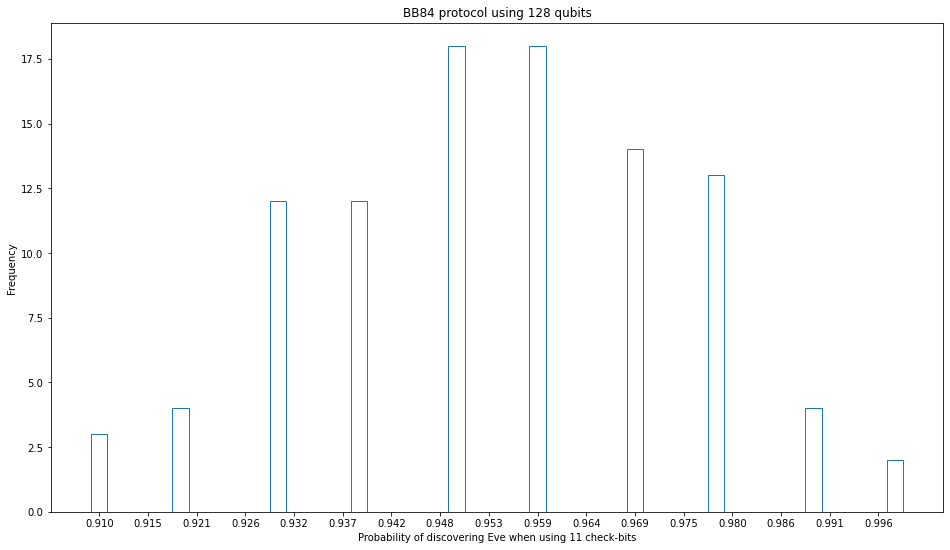

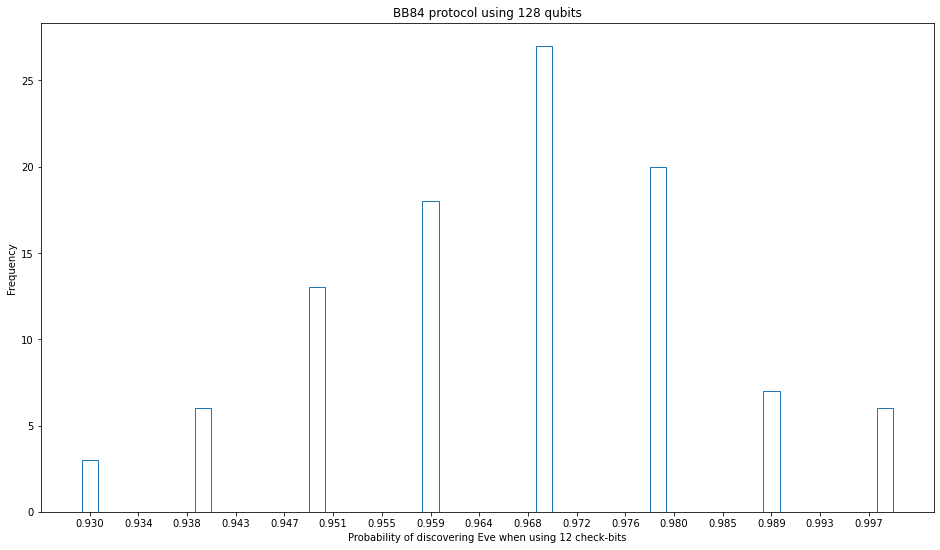

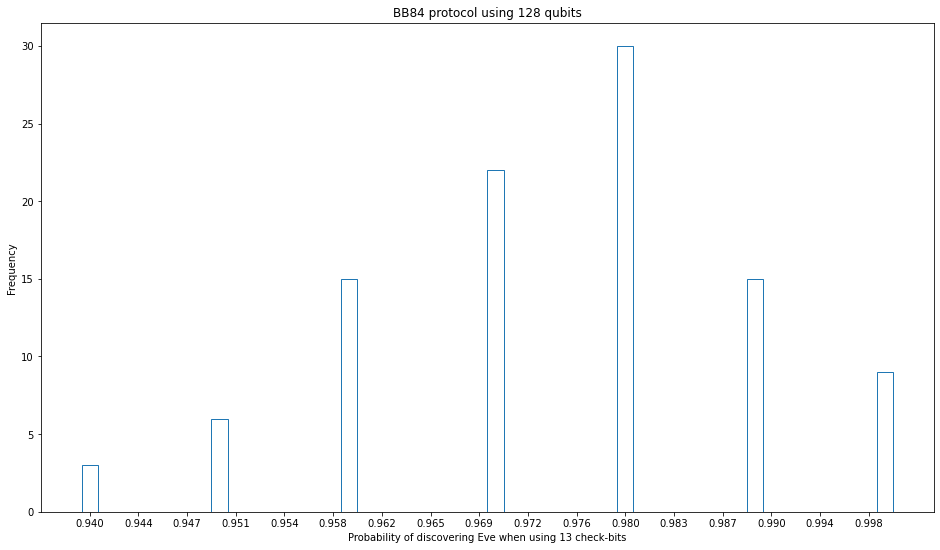

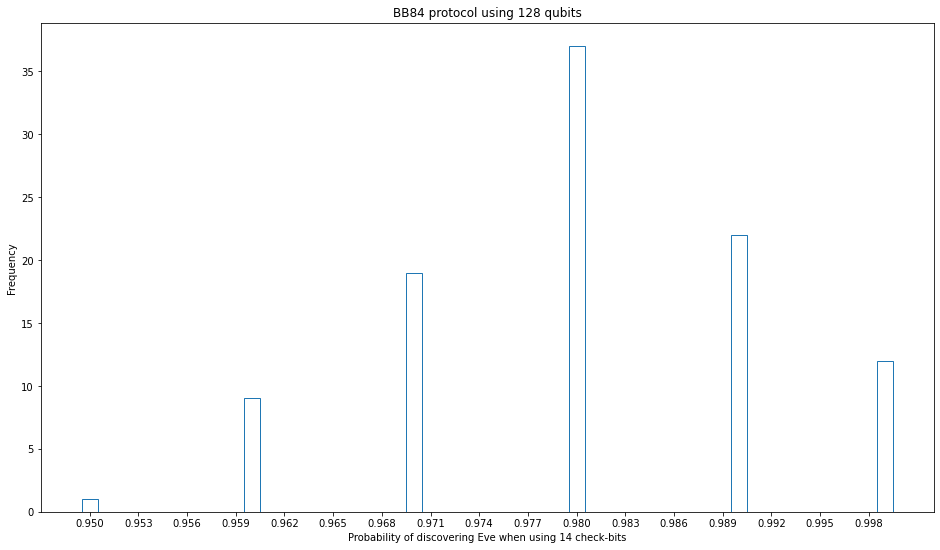

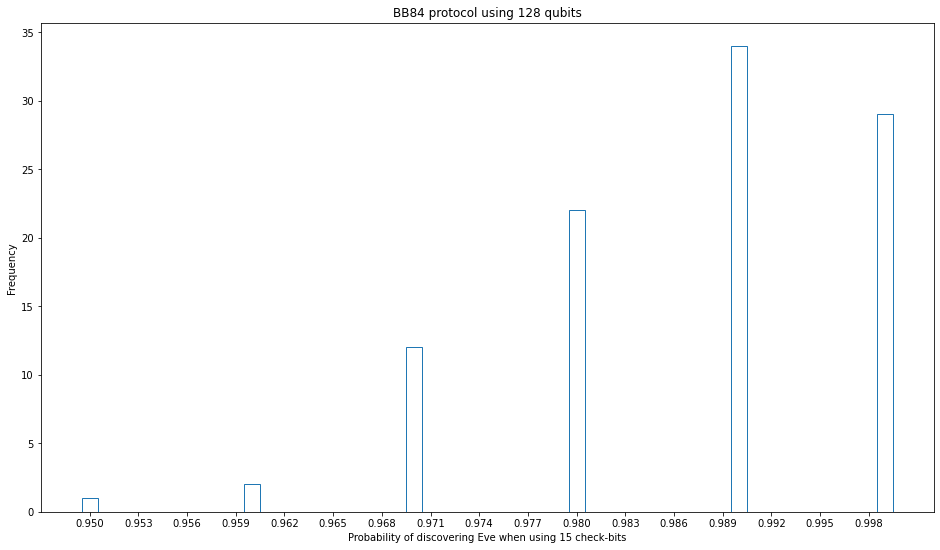

In [37]:
for qb in range(len(N)):
    count,val=[],[]
    plt.figure(num=qb,figsize=(16,9))
    count,val,_=plt.hist(dist[:,qb],bins=50,align='left',histtype='step' )
    ll=['%.3f' %a for a in val]
    plt.xticks(ticks=val[::3],labels=ll[::3])
    plt.xlabel('Probability of discovering Eve when using %i check-bits' %N[qb])
    plt.ylabel('Frequency')
#     plt.xlim(0.1,1)
    plt.title('BB84 protocol using %i qubits'%n)
    plt.savefig(outpath+'/'+'CloserLook_BB84-dist with %i check-bits'%N[qb],dpi=200)
    plt.show()
    plt.close()

## A few of them together

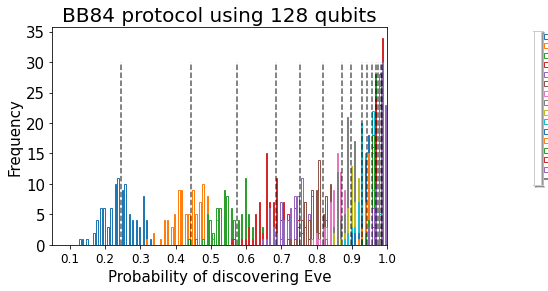

In [67]:
plt.figure()
start = 0
stop  = 1
step  = .05
bins=np.linspace(start, stop, num=250)

for qb in range(len(N)):
    count,val,_=plt.hist(dist[:,qb],align='left',histtype='step',label='Probability using %i check-bits' %N[qb],bins=bins )
plt.vlines(x=avrg,ymin=0,ymax=max(count), colors='k', linestyles='dashed',  label='Average Values',alpha=.63)
plt.xticks(np.arange(start, stop+step, 2*step),fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel('Probability of discovering Eve',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xlim(0.05,1.0)
# plt.grid(axis='x')
plt.legend(shadow=True,fontsize=7,bbox_to_anchor=(1.45,1), loc="upper right",mode='expand')
plt.title('BB84 protocol using %i qubits'%n , fontsize=20)
plt.savefig(outpath+'/'+'BB84-dist-superimposed',dpi=200,bbox_inches="tight")
plt.show()
plt.close()

In [39]:
# print(p)
# N1=np.arange(17)
P=1-(.75)**N
print(P)
# print(np.e)

[0.25       0.4375     0.578125   0.68359375 0.76269531 0.82202148
 0.86651611 0.89988708 0.92491531 0.94368649 0.95776486 0.96832365
 0.97624274 0.98218205 0.98663654]


## Errors between our theoretical values and our simulation values for the probabilities of detecting Eve

In [52]:
# Root Squared error
rse=np.sqrt((avrg-P)**2)
# print('root squared error: \n',rse)

# Difference 
Error=avrg-P
# print("Error: \n",Error)

# Absolute Error
abserr=np.abs(avrg-P)
print('absolute error: \n',abserr)
# print('\nIs root squared error same as absolute error?:\n', rse==abserr)


# Percentage Error
percenterr=(abserr/P)
print('\nPercentage of Error')
for i in percenterr:
    print('%.4f' %i+' %')
    
# print(percenterr)

absolute error: 
 [0.0026     0.0005     0.003325   0.00209375 0.00909531 0.00207852
 0.00568389 0.00091292 0.00221531 0.00051351 0.00266486 0.00052365
 0.00114274 0.00158205 0.00066346]

Percentage of Error
0.0104 %
0.0011 %
0.0058 %
0.0031 %
0.0119 %
0.0025 %
0.0066 %
0.0010 %
0.0024 %
0.0005 %
0.0028 %
0.0005 %
0.0012 %
0.0016 %
0.0007 %


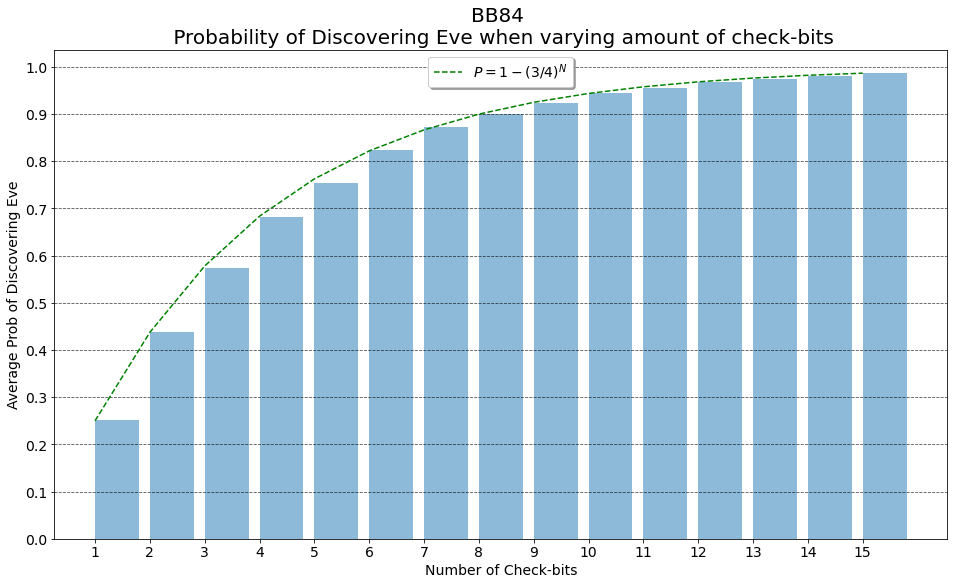

In [101]:
# for i in range(len(N)):
# count,val=[],[]
plt.figure(figsize=(16,9))
plt.bar(N,avrg,alpha=.5,align='edge')
# plt.plot(N,avrg,'ok',label='Simulation')
plt.plot(N,P,'--g',label='$P=1-(3/4)^N$')
plt.xticks(ticks=N,fontsize=14)
plt.yticks(ticks=np.arange(start,stop+step,2*step),fontsize=14)
plt.xlabel('Number of Check-bits',fontsize=14)
plt.ylabel('Average Prob of Discovering Eve',fontsize=14)
plt.title('BB84 \n Probability of Discovering Eve when varying amount of check-bits', fontsize=20)
plt.legend(fontsize=14,loc='upper center',shadow=True)
plt.grid(axis='y',color='k',linestyle='--',alpha=.7)
plt.savefig(outpath+'/'+'BB84-prob-per-Check-bits.png',dpi=200,format='png')
plt.show()
plt.close()

# We also have a CSV file with data from a more precise simulation

We won't need to run a sim each time you need to look a the plots or generate other plots

We can use pandas to read the CSV file provided in the Github Repo

In [2]:
import pandas as pd

## Configuration of the plots

In [14]:
df=pd.read_csv('Distribution-Data-for-BB84.csv')
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.234,0.429,0.585,0.675,0.747,0.833,0.850,0.910,0.927,0.942,0.956,0.961,0.981,0.989,0.985
1,0.257,0.453,0.565,0.701,0.753,0.823,0.857,0.882,0.926,0.944,0.950,0.958,0.981,0.978,0.993
2,0.251,0.393,0.564,0.685,0.742,0.813,0.859,0.879,0.923,0.935,0.943,0.959,0.973,0.985,0.980
3,0.248,0.421,0.569,0.659,0.792,0.831,0.870,0.905,0.920,0.948,0.946,0.961,0.977,0.986,0.983
4,0.246,0.450,0.574,0.701,0.753,0.827,0.883,0.900,0.926,0.942,0.951,0.966,0.968,0.982,0.985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.258,0.425,0.562,0.697,0.750,0.824,0.865,0.896,0.921,0.950,0.956,0.967,0.981,0.981,0.984
996,0.250,0.437,0.559,0.679,0.769,0.812,0.878,0.904,0.934,0.945,0.962,0.973,0.980,0.986,0.986
997,0.252,0.423,0.574,0.681,0.762,0.825,0.867,0.894,0.926,0.937,0.971,0.978,0.973,0.980,0.987
998,0.241,0.439,0.559,0.679,0.763,0.820,0.877,0.907,0.925,0.925,0.952,0.965,0.980,0.981,0.992


In [15]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1000 non-null   float64
 1   2       1000 non-null   float64
 2   3       1000 non-null   float64
 3   4       1000 non-null   float64
 4   5       1000 non-null   float64
 5   6       1000 non-null   float64
 6   7       1000 non-null   float64
 7   8       1000 non-null   float64
 8   9       1000 non-null   float64
 9   10      1000 non-null   float64
 10  11      1000 non-null   float64
 11  12      1000 non-null   float64
 12  13      1000 non-null   float64
 13  14      1000 non-null   float64
 14  15      1000 non-null   float64
dtypes: float64(15)
memory usage: 117.2 KB
None


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.250526,0.437693,0.578709,0.683454,0.763142,0.822009,0.866799,0.899874,0.925166,0.944141,0.957511,0.968614,0.976102,0.982232,0.986593
std,0.013575,0.015157,0.014875,0.015038,0.013458,0.012421,0.010738,0.009407,0.008191,0.007446,0.006423,0.005409,0.004827,0.004178,0.003575
min,0.209000,0.385000,0.536000,0.640000,0.723000,0.777000,0.830000,0.862000,0.897000,0.921000,0.933000,0.950000,0.961000,0.967000,0.975000
25%,0.241000,0.427000,0.569000,0.674000,0.755000,0.814000,0.860000,0.894000,0.920000,0.939000,0.953000,0.965000,0.973000,0.980000,0.984000
50%,0.251000,0.439000,0.578000,0.684000,0.763000,0.822000,0.867000,0.900000,0.925000,0.945000,0.958000,0.969000,0.976000,0.982000,0.987000
75%,0.259000,0.448000,0.589000,0.692250,0.772000,0.831000,0.874000,0.907000,0.930000,0.949000,0.962000,0.972000,0.979000,0.985000,0.989000
max,0.300000,0.491000,0.629000,0.730000,0.809000,0.863000,0.896000,0.934000,0.949000,0.967000,0.973000,0.983000,0.991000,0.993000,0.998000


In [16]:
#Where to store the plots
outpath='plots_BB84'

#Check if folder exists
if outpath not in os.listdir():
    os.mkdir(outpath)
else: 
    print(outpath,'already exists!')


#Configuration for the plots
start = 0
stop  = 1
step  = .05
bins=np.linspace(start, stop, num=250)
    

plots_BB84 already exists!


## All Checkbit distributions

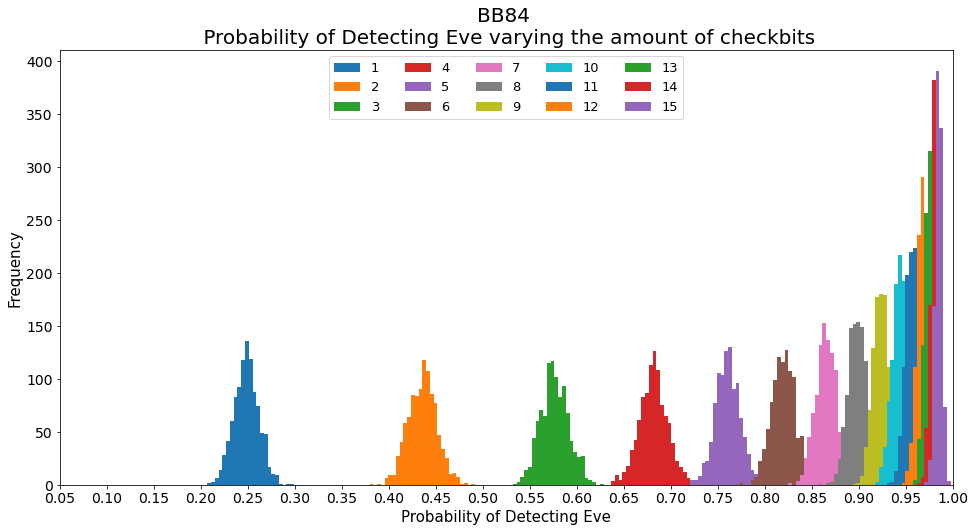

In [18]:
df.plot(figsize=(16,8),kind='hist',fontsize=14, align='left',histtype='stepfilled' ,bins=bins)
plt.legend(loc='upper center',ncol=5,fontsize=13)
plt.ylabel('Frequency',fontsize=15)
plt.xlabel('Probability of Detecting Eve', fontsize=15)
plt.xticks(np.arange(start, stop+step, step))
plt.xlim(0.05,1.0)
plt.title('BB84 \n Probability of Detecting Eve varying the amount of checkbits',fontsize=20)
plt.savefig(outpath+'/'+'Pandas-Dist-Supermposed-All.png',dpi=200,format='png')
plt.show()

## Testing


In [33]:
avrg=df.mean()
avrg

1     0.250526
2     0.437693
3     0.578709
4     0.683454
5     0.763142
6     0.822009
7     0.866799
8     0.899874
9     0.925166
10    0.944141
11    0.957511
12    0.968614
13    0.976102
14    0.982232
15    0.986593
dtype: float64

In [50]:
df[df.columns[qb]]

IndexError: index 15 is out of bounds for axis 0 with size 15

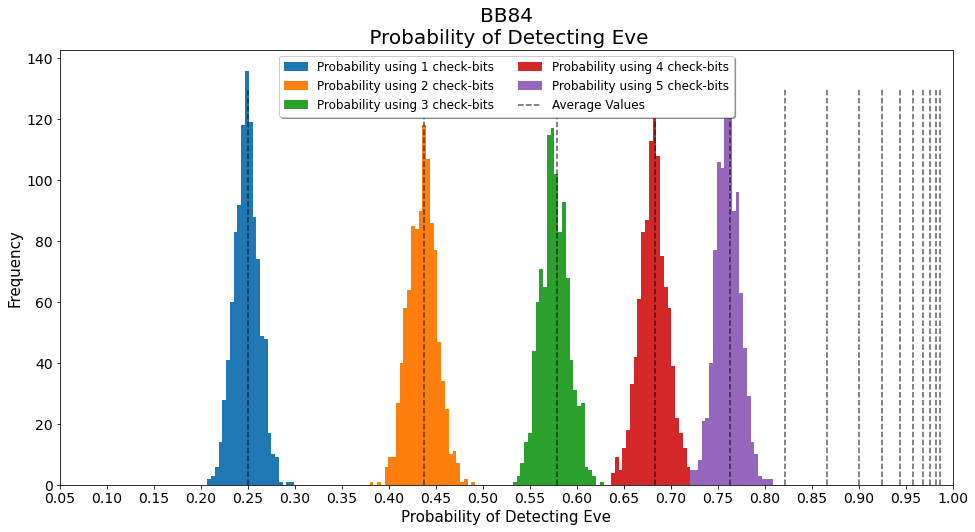

In [56]:


plt.figure(figsize=(16,8))
for qb in range(5):
#     if qb==2**a[-1]:
#         count,val,_=plt.hist(df["15"],align='left',histtype='bar',label='Probability using 15 check-bits' ,bins=bins )
#     else:
    count,val,_=plt.hist(df[df.columns[qb]],align='left',histtype='bar',label='Probability using %s check-bits' %df.columns[qb],bins=bins )

plt.vlines(x=avrg,ymin=0,ymax=max(count), colors='k', linestyles='dashed',  label='Average Values',alpha=.63)
# plt.vlines(x=avrg,ymin=0,ymax=max(count), colors='k', linestyles='dashed',alpha=.63)
plt.xticks(np.arange(start, stop+step, step),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Probability of Detecting Eve',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xlim(0.05,1.0)
# plt.grid(axis='x')
plt.legend(loc='upper center',ncol=2,shadow=True,fontsize=12)
plt.title('BB84\n Probability of Detecting Eve' , fontsize=20)
plt.savefig(outpath+'/'+'Pandas-BB84-dist-superimposed.png',dpi=200,format='png')
plt.show()
plt.close()

## End testing

## Some of the Distributions and their average values

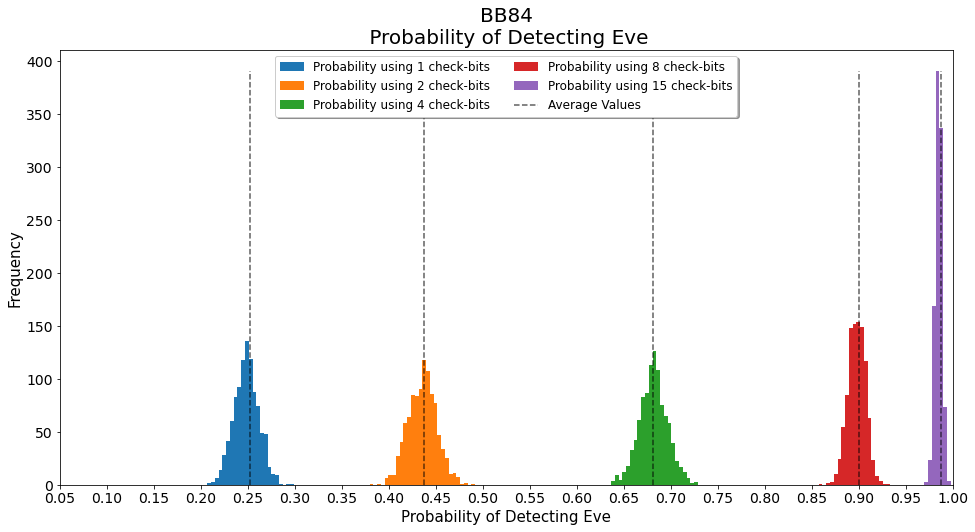

In [111]:
plt.figure(figsize=(16,8))
for qb in 2**a:
    if qb==2**a[-1]:
        count,val,_=plt.hist(df["15"],align='left',histtype='bar',label='Probability using 15 check-bits' ,bins=bins )
    else:
        plt.hist(df['%s'%qb],align='left',histtype='bar',label='Probability using %i check-bits' %qb,bins=bins )

plt.vlines(x=avrg[2**a[:-1]-1],ymin=0,ymax=max(count), colors='k', linestyles='dashed',  label='Average Values',alpha=.63)
plt.vlines(x=avrg[-1],ymin=0,ymax=max(count), colors='k', linestyles='dashed',alpha=.63)
plt.xticks(np.arange(start, stop+step, step),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Probability of Detecting Eve',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xlim(0.05,1.0)
# plt.grid(axis='x')
plt.legend(loc='upper center',ncol=2,shadow=True,fontsize=12)
plt.title('BB84\n Probability of Detecting Eve' , fontsize=20)
plt.savefig(outpath+'/'+'Pandas-BB84-dist-superimposed.png',dpi=200,format='png')
plt.show()
plt.close()